In [1400]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1401]:
pitching_path = '/Users/gabriellevy/Documents/Independent_Study/OpenBiomechanics/baseball_pitching/data/'
hitting_path = '/Users/gabriellevy/Documents/Independent_Study/OpenBiomechanics/baseball_hitting/data/'

# Data Exploration, Merging data

In [1402]:
poi = pd.read_csv(pitching_path + 'poi/poi_metrics.csv')

In [1403]:
metadata = pd.read_csv(pitching_path + 'metadata.csv')

In [1404]:
poi.columns

Index(['session_pitch', 'session', 'p_throws', 'pitch_type', 'pitch_speed_mph',
       'max_shoulder_internal_rotational_velo', 'max_elbow_extension_velo',
       'max_torso_rotational_velo', 'max_rotation_hip_shoulder_separation',
       'max_elbow_flexion', 'max_shoulder_external_rotation',
       'elbow_flexion_fp', 'elbow_pronation_fp',
       'rotation_hip_shoulder_separation_fp',
       'shoulder_horizontal_abduction_fp', 'shoulder_abduction_fp',
       'shoulder_external_rotation_fp', 'lead_knee_extension_angular_velo_fp',
       'lead_knee_extension_angular_velo_br',
       'lead_knee_extension_angular_velo_max', 'torso_anterior_tilt_fp',
       'torso_lateral_tilt_fp', 'torso_rotation_fp', 'pelvis_anterior_tilt_fp',
       'pelvis_lateral_tilt_fp', 'pelvis_rotation_fp', 'max_cog_velo_x',
       'torso_rotation_min', 'max_pelvis_rotational_velo',
       'glove_shoulder_horizontal_abduction_fp', 'glove_shoulder_abduction_fp',
       'glove_shoulder_external_rotation_fp', 'glove_

In [1405]:
metadata.columns

Index(['user', 'session', 'session_pitch', 'session_mass_kg',
       'session_height_m', 'age_yrs', 'playing_level', 'pitch_speed_mph',
       'filename_new', 'modelname_new'],
      dtype='object')

In [1406]:
metadata.drop(columns=['user', 'session', 'pitch_speed_mph', 'filename_new', 'modelname_new'], axis=1, inplace=True)

In [1407]:
poi_metadata = poi.merge(metadata, on='session_pitch', how='left')
poi_metadata

,session_pitch,session,p_throws,pitch_type,pitch_speed_mph,max_shoulder_internal_rotational_velo,max_elbow_extension_velo,max_torso_rotational_velo,max_rotation_hip_shoulder_separation,max_elbow_flexion,...,lead_grf_y_max,lead_grf_z_max,lead_grf_mag_max,lead_grf_angle_at_max,peak_rfd_rear,peak_rfd_lead,session_mass_kg,session_height_m,age_yrs,playing_level
0,1031_2,1031,R,FF,90.4,4533.2480,2445.8177,958.0878,32.3152,109.9971,...,270.7849,2484.8747,2782.9580,63.3501,11.6564,170.4620,110.6784,1.9304,21.40,college
1,1031_3,1031,R,FF,90.4,4571.1735,2389.5438,969.5766,32.5547,109.1065,...,252.1999,2690.7521,3038.8913,62.3087,9.5715,183.6636,110.6784,1.9304,21.40,college
2,1097_1,1097,R,FF,77.6,4165.3055,2426.3029,1090.2269,33.1477,123.4752,...,245.4411,1767.4604,2010.5341,61.5594,4.4432,52.9333,101.1528,1.9304,19.41,college
3,1097_2,1097,R,FF,77.0,3832.1715,2424.0493,1105.2275,27.9286,124.6578,...,280.5177,1715.1864,1864.0488,66.6789,6.4897,54.3727,101.1528,1.9304,19.41,college
4,1097_3,1097,R,FF,76.1,3970.7971,2497.6253,1110.4850,28.9909,124.8308,...,337.4227,2120.4510,2283.1749,65.9014,7.2019,106.2719,101.1528,1.9304,19.41,college
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,3252_1,3252,R,FF,80.8,4494.0446,2759.7142,1129.4168,42.9000,123.5448,...,141.5886,1685.4288,1891.2377,63.0494,6307.8100,72742.9029,88.4520,1.8796,20.38,college
407,3252_2,3252,R,FF,80.8,4550.4618,2742.8536,1129.4417,43.5008,123.5490,...,104.1382,1708.8564,1932.4776,61.7749,7850.2644,77906.1103,88.4520,1.8796,20.38,college
408,3252_3,3252,R,FF,80.8,4580.0385,2796.3719,1133.8676,43.7838,125.6560,...,86.2704,1647.5457,1858.1106,62.8667,16303.1697,77777.3331,88.4520,1.8796,20.38,college
409,3252_4,3252,R,FF,83.3,4638.4414,2815.9331,1119.5235,43.0352,127.5534,...,117.9198,1658.6645,1863.5780,63.3718,11758.9779,77382.0300,88.4520,1.8796,20.38,college


In [1408]:
poi_metadata.p_throws = np.where(poi_metadata.p_throws == 'R', 1, 0)

Text(0.5, 1.0, 'Playing Level Distribution')

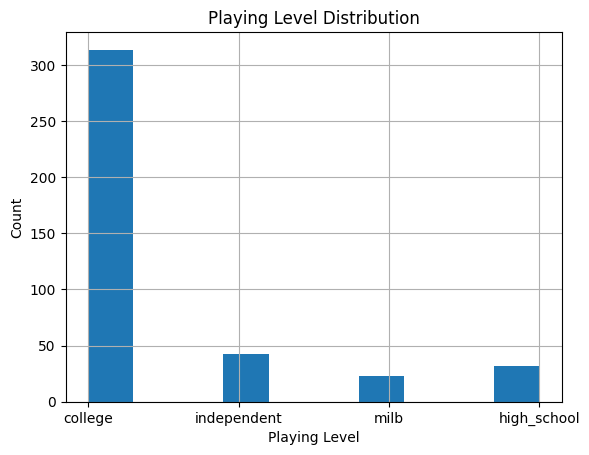

In [1409]:
poi_metadata.playing_level.hist()
plt.xlabel('Playing Level')
plt.ylabel('Count')
plt.title('Playing Level Distribution')

In [1410]:
level_encoding = {
    'high_school': 1,
    'college': 2,
    'independent': 3,
    'milb': 4
}
poi_metadata['playing_level'] = poi_metadata['playing_level'].replace(level_encoding)

In [1411]:
poi_metadata.drop('pitch_type', axis=1, inplace=True)

In [1412]:
poi_metadata.drop('session', axis=1, inplace=True)

Text(0.5, 1.0, 'Pitch Speed Distribution')

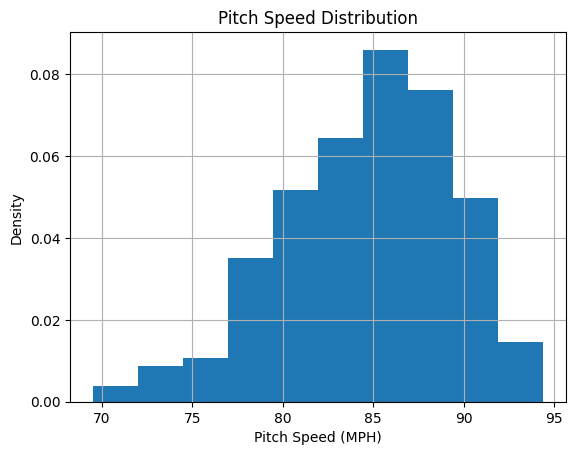

In [1413]:
poi_metadata.pitch_speed_mph.hist(density=True)
plt.xlabel('Pitch Speed (MPH)')
plt.ylabel('Density')
plt.title('Pitch Speed Distribution')

In [1414]:
print(np.mean(poi_metadata.pitch_speed_mph[poi_metadata.playing_level==1]),np.mean(poi_metadata.pitch_speed_mph[poi_metadata.playing_level==2]),np.mean(poi_metadata.pitch_speed_mph[poi_metadata.playing_level==3]),np.mean(poi_metadata.pitch_speed_mph[poi_metadata.playing_level==4]))

79.515625 84.73375796178344 85.94285714285715 89.24782608695651


In [1415]:
pitching_full_sig_path = pitching_path + 'full_sig/'
energy_flow = pd.read_csv(pitching_full_sig_path + 'energy_flow.csv')
force_plate = pd.read_csv(pitching_full_sig_path + 'force_plate.csv')
forces_moments = pd.read_csv(pitching_full_sig_path + 'forces_moments.csv')
joint_angles = pd.read_csv(pitching_full_sig_path + 'joint_angles.csv')
joint_velos = pd.read_csv(pitching_full_sig_path + 'joint_velos.csv')
landmarks = pd.read_csv(pitching_full_sig_path + 'landmarks.csv')

In [1416]:
energy_flow.columns

Index(['session_pitch', 'time', 'rear_knee_energy_transfer_stp',
       'rear_knee_energy_transfer_jfp', 'rear_knee_energy_generated',
       'lead_knee_energy_transfer_stp', 'lead_knee_energy_transfer_jfp',
       'lead_knee_energy_generated', 'rear_hip_energy_transfer_stp',
       'rear_hip_energy_transfer_jfp', 'rear_hip_energy_generated',
       'lead_hip_energy_transfer_stp', 'lead_hip_energy_transfer_jfp',
       'lead_hip_energy_generated', 'elbow_energy_transfer_stp',
       'elbow_energy_transfer_jfp', 'elbow_energy_generated',
       'glove_elbow_energy_transfer_stp', 'glove_elbow_energy_transfer_jfp',
       'glove_elbow_energy_generated', 'shoulder_energy_transfer_stp',
       'shoulder_energy_transfer_jfp', 'shoulder_energy_generated',
       'glove_shoulder_energy_transfer_stp',
       'glove_shoulder_energy_transfer_jfp', 'glove_shoulder_energy_generated',
       'glove_upper_arm_dist_seg_pwr', 'glove_upper_arm_prox_seg_pwr',
       'glove_forearm_dist_seg_pwr', 'glove_f

In [1417]:
force_plate.columns

Index(['session_pitch', 'time', 'rear_force_x', 'rear_force_y', 'rear_force_z',
       'lead_force_x', 'lead_force_y', 'lead_force_z', 'pkh_time',
       'fp_10_time', 'fp_100_time', 'MER_time', 'BR_time', 'MIR_time'],
      dtype='object')

In [1418]:
forces_moments.columns

Index(['session_pitch', 'time', 'rear_ankle_moment_x', 'rear_ankle_moment_y',
       'rear_ankle_moment_z', 'elbow_moment_x', 'elbow_moment_y',
       'elbow_moment_z', 'rear_hip_rear_thigh_moment_x',
       'rear_hip_rear_thigh_moment_y',
       ...
       'glove_shoulder_thorax_force_z', 'glove_wrist_force_x',
       'glove_wrist_force_y', 'glove_wrist_force_z', 'pkh_time', 'fp_10_time',
       'fp_100_time', 'MER_time', 'BR_time', 'MIR_time'],
      dtype='object', length=104)

In [1419]:
joint_angles.columns

Index(['session_pitch', 'time', 'rear_ankle_angle_x', 'rear_ankle_angle_y',
       'rear_ankle_angle_z', 'elbow_angle_x', 'elbow_angle_y', 'elbow_angle_z',
       'rear_hip_angle_x', 'rear_hip_angle_y', 'rear_hip_angle_z',
       'rear_knee_angle_x', 'rear_knee_angle_y', 'rear_knee_angle_z',
       'shoulder_angle_x', 'shoulder_angle_y', 'shoulder_angle_z',
       'wrist_angle_x', 'wrist_angle_y', 'wrist_angle_z', 'pelvis_angle_x',
       'pelvis_angle_y', 'pelvis_angle_z', 'lead_ankle_angle_x',
       'lead_ankle_angle_y', 'lead_ankle_angle_z', 'glove_elbow_angle_x',
       'glove_elbow_angle_y', 'glove_elbow_angle_z', 'lead_hip_angle_x',
       'lead_hip_angle_y', 'lead_hip_angle_z', 'lead_knee_angle_x',
       'lead_knee_angle_y', 'lead_knee_angle_z', 'glove_shoulder_angle_x',
       'glove_shoulder_angle_y', 'glove_shoulder_angle_z',
       'glove_wrist_angle_x', 'glove_wrist_angle_y', 'glove_wrist_angle_z',
       'torso_angle_x', 'torso_angle_y', 'torso_angle_z',
       'torso_pe

In [1420]:
joint_velos.columns

Index(['session_pitch', 'time', 'elbow_velo_x', 'elbow_velo_y', 'elbow_velo_z',
       'rear_hip_velo_x', 'rear_hip_velo_y', 'rear_hip_velo_z',
       'rear_knee_velo_x', 'rear_knee_velo_y', 'rear_knee_velo_z',
       'shoulder_velo_x', 'shoulder_velo_y', 'shoulder_velo_z', 'wrist_velo_x',
       'wrist_velo_y', 'wrist_velo_z', 'pelvis_velo_x', 'pelvis_velo_y',
       'pelvis_velo_z', 'glove_elbow_velo_x', 'glove_elbow_velo_y',
       'glove_elbow_velo_z', 'lead_hip_velo_x', 'lead_hip_velo_y',
       'lead_hip_velo_z', 'lead_knee_velo_x', 'lead_knee_velo_y',
       'lead_knee_velo_z', 'glove_shoulder_velo_x', 'glove_shoulder_velo_y',
       'glove_shoulder_velo_z', 'glove_wrist_velo_x', 'glove_wrist_velo_y',
       'glove_wrist_velo_z', 'torso_velo_x', 'torso_velo_y', 'torso_velo_z',
       'torso_pelvis_velo_x', 'torso_pelvis_velo_y', 'torso_pelvis_velo_z',
       'pkh_time', 'fp_10_time', 'fp_100_time', 'MER_time', 'BR_time',
       'MIR_time'],
      dtype='object')

In [1421]:
landmarks.columns

Index(['session_pitch', 'time', 'rear_ankle_jc_x', 'rear_ankle_jc_y',
       'rear_ankle_jc_z', 'rear_hip_x', 'rear_hip_y', 'rear_hip_z',
       'elbow_jc_x', 'elbow_jc_y', 'elbow_jc_z', 'hand_jc_x', 'hand_jc_y',
       'hand_jc_z', 'rear_knee_jc_x', 'rear_knee_jc_y', 'rear_knee_jc_z',
       'shoulder_jc_x', 'shoulder_jc_y', 'shoulder_jc_z', 'wrist_jc_x',
       'wrist_jc_y', 'wrist_jc_z', 'lead_ankle_jc_x', 'lead_ankle_jc_y',
       'lead_ankle_jc_z', 'lead_hip_x', 'lead_hip_y', 'lead_hip_z',
       'glove_elbow_jc_x', 'glove_elbow_jc_y', 'glove_elbow_jc_z',
       'glove_hand_jc_x', 'glove_hand_jc_y', 'glove_hand_jc_z',
       'lead_knee_jc_x', 'lead_knee_jc_y', 'lead_knee_jc_z',
       'glove_shoulder_jc_x', 'glove_shoulder_jc_y', 'glove_shoulder_jc_z',
       'glove_wrist_jc_x', 'glove_wrist_jc_y', 'glove_wrist_jc_z',
       'thorax_ap_x', 'thorax_ap_y', 'thorax_ap_z', 'thorax_dist_x',
       'thorax_dist_y', 'thorax_dist_z', 'thorax_prox_x', 'thorax_prox_y',
       'thorax_prox_z

In [1422]:
print(len(poi_metadata),len(energy_flow),len(force_plate),len(forces_moments),len(joint_angles),len(joint_velos),len(landmarks))

411 247709 727824 247709 247709 247709 247709


In [1423]:
columns = []
for col in force_plate.columns:
    if col in energy_flow.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = energy_flow.merge(force_plate.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [1424]:
columns = []
for col in forces_moments.columns:
    if col in merged.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = merged.merge(forces_moments.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [1425]:
columns = []
for col in joint_angles.columns:
    if col in merged.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = merged.merge(joint_angles.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [1426]:
columns = []
for col in joint_velos.columns:
    if col in merged.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = merged.merge(joint_velos.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [1427]:
columns = []
for col in landmarks.columns:
    if col in merged.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = merged.merge(landmarks.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [1428]:
merged

,session_pitch,time,rear_knee_energy_transfer_stp,rear_knee_energy_transfer_jfp,rear_knee_energy_generated,lead_knee_energy_transfer_stp,lead_knee_energy_transfer_jfp,lead_knee_energy_generated,rear_hip_energy_transfer_stp,rear_hip_energy_transfer_jfp,...,thorax_ap_z,thorax_dist_x,thorax_dist_y,thorax_dist_z,thorax_prox_x,thorax_prox_y,thorax_prox_z,centerofmass_x,centerofmass_y,centerofmass_z
0,1031_2,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.6123,0.1213,-0.1545,1.3509,0.1147,-0.1729,1.6184,0.1148,-0.1556,1.1440
1,1031_2,0.0028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.6124,0.1218,-0.1547,1.3510,0.1152,-0.1731,1.6184,0.1167,-0.1562,1.1458
2,1031_2,0.0056,45.3350,20.1973,-8.0818,17.7538,6.0121,44.9851,0.1649,19.1142,...,1.6125,0.1221,-0.1549,1.3511,0.1156,-0.1733,1.6184,0.1169,-0.1563,1.1459
3,1031_2,0.0083,38.2959,19.3669,-8.7513,14.0252,4.4715,34.3861,0.0000,18.4929,...,1.6126,0.1224,-0.1551,1.3512,0.1160,-0.1736,1.6185,0.1171,-0.1564,1.1459
4,1031_2,0.0111,31.5861,18.5402,-9.5193,10.4432,3.0432,24.3333,0.0000,17.8197,...,1.6127,0.1227,-0.1553,1.3512,0.1163,-0.1738,1.6186,0.1173,-0.1566,1.1460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247704,3252_5,1.7528,-65.5371,-174.4923,10.9729,-101.9002,25.9129,-321.7640,0.0000,-284.1946,...,1.2854,1.5113,-0.0011,1.1167,1.6018,0.1272,1.2994,1.4461,-0.0296,0.9630
247705,3252_5,1.7556,-57.7275,-163.6167,9.1722,-101.9734,26.6900,-320.3218,0.0000,-277.5526,...,1.2879,1.5129,0.0010,1.1187,1.6033,0.1291,1.3020,1.4480,-0.0290,0.9657
247706,3252_5,1.7583,-53.0746,-157.1646,8.0998,-102.0185,27.1232,-319.4924,0.0000,-273.6412,...,1.2901,1.5144,0.0030,1.1206,1.6048,0.1308,1.3044,1.4500,-0.0285,0.9682
247707,3252_5,1.7611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2920,1.5159,0.0049,1.1222,1.6063,0.1323,1.3065,1.4520,-0.0279,0.9703


In [1429]:
for col in merged.columns:
    if col in poi_metadata.columns:
        print(col)

session_pitch


In [1430]:
all_merged = poi_metadata.merge(merged.drop(columns=columns, axis=1), on = 'session_pitch', how='left')

In [1431]:
all_merged['order'] = all_merged.groupby('session_pitch').cumcount() + 1
all_merged.order

0           1
1           2
2           3
3           4
4           5
         ... 
247704    632
247705    633
247706    634
247707    635
247708    636
Name: order, Length: 247709, dtype: int64

In [1432]:
poi_metadata[poi_metadata.isna().any(axis=1)]

,session_pitch,p_throws,pitch_speed_mph,max_shoulder_internal_rotational_velo,max_elbow_extension_velo,max_torso_rotational_velo,max_rotation_hip_shoulder_separation,max_elbow_flexion,max_shoulder_external_rotation,elbow_flexion_fp,...,lead_grf_y_max,lead_grf_z_max,lead_grf_mag_max,lead_grf_angle_at_max,peak_rfd_rear,peak_rfd_lead,session_mass_kg,session_height_m,age_yrs,playing_level
15,1370_1,1,87.8,4378.9195,2233.9898,1152.4505,28.4991,106.6919,156.3049,95.9804,...,NaN,NaN,NaN,NaN,NaN,NaN,104.3280,1.9050,23.43,3
191,2857_4,1,72.9,4815.1804,2386.8824,877.5712,40.6763,96.2136,165.2810,52.6094,...,NaN,NaN,NaN,NaN,NaN,NaN,69.4008,1.8542,18.85,2
247,2919_2,1,82.6,4924.3223,2775.5162,951.6221,28.8214,132.7934,182.2818,90.9193,...,NaN,NaN,NaN,NaN,NaN,NaN,84.8232,1.9050,18.80,2
248,2919_3,1,84.0,4812.6796,2720.4570,985.4787,29.6014,134.5015,184.0617,93.9795,...,NaN,NaN,NaN,NaN,NaN,NaN,84.8232,1.9050,18.80,2
249,2919_4,1,82.6,4847.2724,2766.5142,954.6934,28.7634,134.0515,183.6061,92.7248,...,NaN,NaN,NaN,NaN,NaN,NaN,84.8232,1.9050,18.80,2
250,2919_5,1,82.6,4991.7229,2821.7158,953.1706,28.0776,132.8751,184.1284,93.9730,...,NaN,NaN,NaN,NaN,NaN,NaN,84.8232,1.9050,18.80,2
251,2923_1,1,78.9,4250.3573,2077.3878,1062.1852,21.4589,101.8802,151.2197,91.0276,...,NaN,NaN,NaN,NaN,NaN,NaN,73.4832,1.7780,20.09,2
252,2923_2,1,76.4,4292.0506,2071.5214,1088.3251,22.0308,100.8572,152.0982,91.2621,...,NaN,NaN,NaN,NaN,NaN,NaN,73.4832,1.7780,20.09,2


In [1433]:
poi_metadata.dropna(inplace=True)

# POI Metadata

Train-test split

In [1434]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [1435]:
poi_train, poi_test, mph_train, mph_test = train_test_split(poi_metadata.drop(columns=['pitch_speed_mph', 'age_yrs', 'playing_level', 'p_throws']), poi_metadata.pitch_speed_mph, test_size=0.2, random_state=42)
poi_train, poi_val, mph_train, mph_val = train_test_split(poi_train, mph_train, test_size=0.2, random_state=42)

In [1436]:
poi_train = poi_train.reset_index().drop(columns='index', axis=1)
poi_val = poi_val.reset_index().drop(columns='index', axis=1)
mph_train = mph_train.reset_index().drop(columns='index', axis=1)
mph_val = mph_val.reset_index().drop(columns='index', axis=1)
poi_test = poi_test.reset_index().drop(columns='index', axis=1)
mph_test = mph_test.reset_index().drop(columns='index', axis=1)

In [1437]:
x_train = poi_train.drop(columns=['session_pitch'])
x_val = poi_val.drop(columns=['session_pitch'])

linear_model = LinearRegression().fit(x_train,mph_train)
print('R^2: ' + str(linear_model.score(x_val,mph_val)))
predictions = linear_model.predict(x_val)
print('RMSE: ' + str(np.sqrt(mean_squared_error(mph_val, predictions))))

R^2: 0.6297368188261151
RMSE: 2.795398588060996


In [1438]:
linear_model = xgb.XGBRegressor(max_depth = 4, reg_lambda=1)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8865704355888562
RMSE: 1.5472183573814748


XGBoost is wayyyyy better

In [1439]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_standardized = scaler.fit_transform(x_train)
x_val_standardized = scaler.transform(x_val)

linear_model = xgb.XGBRegressor(max_depth = 4, reg_lambda=1)
linear_model.fit(x_train_standardized, mph_train)

r_squared = linear_model.score(x_val_standardized, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val_standardized)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8865704355888562
RMSE: 1.5472183573814748


Standardizing makes literally no difference in performance, and it will hinder interpretability, so we will not do this.

In [1440]:
landmarks

,session_pitch,time,rear_ankle_jc_x,rear_ankle_jc_y,rear_ankle_jc_z,rear_hip_x,rear_hip_y,rear_hip_z,elbow_jc_x,elbow_jc_y,...,thorax_prox_z,centerofmass_x,centerofmass_y,centerofmass_z,pkh_time,fp_10_time,fp_100_time,MER_time,BR_time,MIR_time
0,1031_2,0.0000,0.0719,-0.1806,0.0622,-0.0345,-0.1740,0.9830,-0.1766,-0.2383,...,1.6184,0.1148,-0.1556,1.1440,0.625,1.1806,1.1917,1.3056,1.3389,1.3778
1,1031_2,0.0028,0.0720,-0.1806,0.0623,-0.0343,-0.1738,0.9832,-0.1764,-0.2382,...,1.6184,0.1167,-0.1562,1.1458,0.625,1.1806,1.1917,1.3056,1.3389,1.3778
2,1031_2,0.0056,0.0719,-0.1806,0.0624,-0.0342,-0.1736,0.9833,-0.1762,-0.2380,...,1.6184,0.1169,-0.1563,1.1459,0.625,1.1806,1.1917,1.3056,1.3389,1.3778
3,1031_2,0.0083,0.0719,-0.1806,0.0624,-0.0341,-0.1734,0.9835,-0.1762,-0.2378,...,1.6185,0.1171,-0.1564,1.1459,0.625,1.1806,1.1917,1.3056,1.3389,1.3778
4,1031_2,0.0111,0.0718,-0.1805,0.0624,-0.0341,-0.1732,0.9836,-0.1762,-0.2377,...,1.6186,0.1173,-0.1566,1.1460,0.625,1.1806,1.1917,1.3056,1.3389,1.3778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247704,3252_5,1.7528,0.7124,-0.4337,0.7062,1.4425,-0.2609,0.8528,1.4963,0.1718,...,1.2994,1.4461,-0.0296,0.9630,0.800,1.4139,1.4278,1.5500,1.5778,1.6139
247705,3252_5,1.7556,0.7193,-0.4447,0.7169,1.4456,-0.2594,0.8554,1.4979,0.1699,...,1.3020,1.4480,-0.0290,0.9657,0.800,1.4139,1.4278,1.5500,1.5778,1.6139
247706,3252_5,1.7583,0.7261,-0.4550,0.7268,1.4485,-0.2579,0.8577,1.4998,0.1686,...,1.3044,1.4500,-0.0285,0.9682,0.800,1.4139,1.4278,1.5500,1.5778,1.6139
247707,3252_5,1.7611,0.7325,-0.4643,0.7359,1.4514,-0.2565,0.8598,1.5018,0.1677,...,1.3065,1.4520,-0.0279,0.9703,0.800,1.4139,1.4278,1.5500,1.5778,1.6139


In [1441]:
max_time_per_session = all_merged.groupby('session_pitch')['time'].max().reset_index()
idx = landmarks.groupby('session_pitch')['lead_knee_jc_z'].idxmax()
peak_leg_lift_time = landmarks.loc[idx, ['session_pitch', 'lead_knee_jc_z', 'time']].rename(columns={'time': 'peak_knee_time', 'lead_knee_jc_z': 'max_lead_knee_jc_z'}).reset_index(drop=True)
BR_FP_time = landmarks.groupby('session_pitch')[['BR_time', 'fp_10_time', 'fp_100_time']].max().reset_index()
timing_df = peak_leg_lift_time.merge(BR_FP_time, on='session_pitch', how='inner')
timing_df['peak_knee_to_BR_time'] = timing_df.BR_time - timing_df.peak_knee_time
timing_df['peak_knee_to_FS_time'] = timing_df.fp_10_time - timing_df.peak_knee_time
timing_df['peak_knee_to_FP_time'] = timing_df.fp_100_time - timing_df.peak_knee_time
timing_df['FS_to_BR_time'] = timing_df.BR_time - timing_df.fp_10_time
timing_df['FP_to_BR_time'] = timing_df.BR_time - timing_df.fp_100_time
timing_df = timing_df.merge(max_time_per_session, on='session_pitch', how='left').rename(columns={'time': 'total_time'})

timing_df

,session_pitch,max_lead_knee_jc_z,peak_knee_time,BR_time,fp_10_time,fp_100_time,peak_knee_to_BR_time,peak_knee_to_FS_time,peak_knee_to_FP_time,FS_to_BR_time,FP_to_BR_time,total_time
0,1031_2,1.1610,0.6250,1.3389,1.1806,1.1917,0.7139,0.5556,0.5667,0.1583,0.1472,1.5250
1,1031_3,1.1455,0.0917,0.8250,0.6639,0.6806,0.7333,0.5722,0.5889,0.1611,0.1444,1.0167
2,1097_1,1.2528,0.1056,1.0028,0.7722,0.8278,0.8972,0.6666,0.7222,0.2306,0.1750,1.1944
3,1097_2,1.3346,0.1722,1.0611,0.8528,0.8917,0.8889,0.6806,0.7195,0.2083,0.1694,1.2361
4,1097_3,1.3434,0.1472,1.0306,0.8361,0.8472,0.8834,0.6889,0.7000,0.1945,0.1834,1.2361
...,...,...,...,...,...,...,...,...,...,...,...,...
406,3252_1,1.1282,1.1250,1.9167,1.7556,1.7722,0.7917,0.6306,0.6472,0.1611,0.1445,2.0722
407,3252_2,1.1912,0.8583,1.6722,1.5111,1.5250,0.8139,0.6528,0.6667,0.1611,0.1472,1.8139
408,3252_3,1.1596,0.8944,1.6889,1.5306,1.5444,0.7945,0.6362,0.6500,0.1583,0.1445,1.8778
409,3252_4,1.1912,0.6250,1.4444,1.2861,1.3083,0.8194,0.6611,0.6833,0.1583,0.1361,1.6500


In [1442]:
# Merge this information back into poi_metadata
poi_train_new = pd.merge(poi_train, timing_df.drop(columns=['BR_time', 'fp_10_time', 'fp_100_time', 'peak_knee_time'], axis=1), on='session_pitch', how='left')
poi_val_new = pd.merge(poi_val, timing_df.drop(columns=['BR_time', 'fp_10_time', 'fp_100_time', 'peak_knee_time'], axis=1), on='session_pitch', how='left')
poi_test_new = pd.merge(poi_test, timing_df.drop(columns=['BR_time', 'fp_10_time', 'fp_100_time', 'peak_knee_time'], axis=1), on='session_pitch', how='left')

In [1443]:
x_train = poi_train_new.drop(columns=['session_pitch'])
x_val = poi_val_new.drop(columns=['session_pitch'])
linear_model = xgb.XGBRegressor(max_depth = 6, reg_lambda=1.4)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8841067723985301
RMSE: 1.5639307053625295


In [1444]:
from scipy import stats
import statsmodels.api as sm

In [1445]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
47,elbow_transfer_fp_br,3.935630e-01
63,thorax_distal_transfer_fp_br,1.197497e-01
21,max_cog_velo_x,6.378599e-02
83,FP_to_BR_time,4.105130e-02
32,elbow_varus_moment,3.631021e-02
...,...,...
39,stride_length,3.726295e-05
10,shoulder_abduction_fp,3.642422e-05
27,glove_shoulder_abduction_mer,6.738277e-06
49,elbow_absorption_fp_br,5.091020e-06


In [1446]:
model = sm.OLS(mph_train, x_train)
result = model.fit()

In [1447]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        pitch_speed_mph   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              9236.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):                   2.82e-284
Time:                        19:15:39   Log-Likelihood:                         -427.78
No. Observations:                 257   AIC:                                      1022.
Df Residuals:                     174   BIC:                                      1316.
Df Model:                          83                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
max_shoulder_internal_rotational_velo        -0.0010      0.001     -1.405      0.162      -0.002       0.000
max_elbow_extension_velo                      0.0044      0.001      2.968      0.003       0.001       0.007
max_torso_rotational_velo                     0.0247      0.004      6.447      0.000       0.017       0.032
max_rotation_hip_shoulder_separation         -0.0924      0.091     -1.015      0.312      -0.272       0.087
max_elbow_flexion                             0.0979      0.043      2.266      0.025       0.013       0.183
max_shoulder_external_rotation                0.0822      0.029      2.804      0.006       0.024       0.140
elbow_flexion_fp                             -0.0060      0.023     -0.258      0.796      -0.052       0.040
elbow_pronation_fp                            0.0077      0.012      0.658      0.511      -0.015       0.031
rotation_hip_shoulder_separation_fp           0.2572      0.158      1.625      0.106      -0.055       0.570
shoulder_horizontal_abduction_fp             -0.0125      0.031     -0.405      0.686      -0.074       0.048
shoulder_abduction_fp                         0.0920      0.032      2.917      0.004       0.030       0.154
shoulder_external_rotation_fp                -0.0659      0.016     -4.088      0.000      -0.098      -0.034
lead_knee_extension_angular_velo_fp          -0.0003      0.001     -0.209      0.835      -0.003       0.002
lead_knee_extension_angular_velo_br           0.0062      0.002      3.206      0.002       0.002       0.010
lead_knee_extension_angular_velo_max         -0.0032      0.002     -1.543      0.125      -0.007       0.001
torso_anterior_tilt_fp                        0.1063      0.042      2.507      0.013       0.023       0.190
torso_lateral_tilt_fp                        -0.0260      0.050     -0.521      0.603      -0.124       0.072
torso_rotation_fp                             0.3110      0.176      1.764      0.080      -0.037       0.659
pelvis_anterior_tilt_fp                       0.1007      0.028      3.557      0.000       0.045       0.157
pelvis_lateral_tilt_fp                       -0.0905      0.052     -1.749      0.082      -0.193       0.012
pelvis_rotation_fp                           -0.0960      0.177     -0.541      0.589      -0.446       0.254
max_cog_velo_x                                2.0295      1.229      1.651      0.101      -0.397       4.456
torso_rotation_min                            0.0098      0.021      0.461      0.646      -0.032       0.052
max_pelvis_rotational_velo                   -0.0045      0.003     -1.549      0.123      -0.010       0.001
glove_shoulder

In [1448]:
summary_as_html = result.summary().tables[1].as_html()
coef_df = pd.read_html(summary_as_html, header=0, index_col=0)[0]

coef_df = coef_df.reset_index().rename(columns={'index': 'feature', 'coef': 'coefficient', 'std err': 'SE', 'P>|t|': 'p_value'})

In [1449]:
coef_df

,feature,coefficient,SE,t,p_value,[0.025,0.975]
0,max_shoulder_internal_rotational_velo,-0.0010,0.001,-1.405,0.162,-0.002,0.000
1,max_elbow_extension_velo,0.0044,0.001,2.968,0.003,0.001,0.007
2,max_torso_rotational_velo,0.0247,0.004,6.447,0.000,0.017,0.032
3,max_rotation_hip_shoulder_separation,-0.0924,0.091,-1.015,0.312,-0.272,0.087
4,max_elbow_flexion,0.0979,0.043,2.266,0.025,0.013,0.183
...,...,...,...,...,...,...,...
80,peak_knee_to_FS_time,-9.9590,7.408,-1.344,0.181,-24.580,4.662
81,peak_knee_to_FP_time,11.5251,7.238,1.592,0.113,-2.760,25.810
82,FS_to_BR_time,12.5088,7.329,1.707,0.090,-1.957,26.974
83,FP_to_BR_time,-8.9753,8.260,-1.087,0.279,-25.277,7.327


In [1450]:
corr_matrix = x_train.corr()

# Create a DataFrame to store highly correlated pairs
high_corr_pairs = []
inter_features = []

# Iterate through the correlation matrix to find highly correlated pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.6:  # assuming a threshold of 0.6 for high correlation
            colname = corr_matrix.columns[i] + '_int_' + corr_matrix.columns[j]  # Name of the new interaction column
            inter_features.append(colname)
            poi_train_new[colname] = poi_train_new[corr_matrix.columns[i]] * poi_train_new[corr_matrix.columns[j]]
            poi_val_new[colname] = poi_val_new[corr_matrix.columns[i]] * poi_val_new[corr_matrix.columns[j]]
            poi_test_new[colname] = poi_test_new[corr_matrix.columns[i]] * poi_test_new[corr_matrix.columns[j]]
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature1', 'Feature2', 'Correlation'])
high_corr_df

,Feature1,Feature2,Correlation
0,elbow_flexion_fp,max_elbow_flexion,0.796856
1,rotation_hip_shoulder_separation_fp,max_rotation_hip_shoulder_separation,0.912320
2,lead_knee_extension_angular_velo_max,lead_knee_extension_angular_velo_br,0.807743
3,pelvis_rotation_fp,torso_rotation_fp,0.839039
4,torso_rotation_mer,torso_anterior_tilt_mer,0.682533
5,shoulder_internal_rotation_moment,elbow_varus_moment,0.980438
6,torso_anterior_tilt_br,torso_anterior_tilt_mer,0.939138
7,torso_anterior_tilt_br,torso_rotation_mer,0.626818
8,torso_lateral_tilt_br,torso_lateral_tilt_mer,0.923954
9,torso_rotation_br,torso_rotation_mer,0.898598


In [1451]:
x_train = poi_train_new.drop(columns=['session_pitch'])
x_val = poi_val_new.drop(columns=['session_pitch'])

In [1452]:
linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda=1.3)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.839385559972118
RMSE: 1.8411143854955385


Going to hold out for a second

In [1453]:
inter_model = sm.OLS(mph_train, x_train)
inter_result = inter_model.fit()

In [1454]:
inter_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        pitch_speed_mph   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              9817.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):                   3.70e-208
Time:                        19:15:40   Log-Likelihood:                         -309.83
No. Observations:                 257   AIC:                                      891.7
Df Residuals:                     121   BIC:                                      1374.
Df Model:                         136                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================================================
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------
max_shoulder_internal_rotational_velo                                           -0.0007      0.001     -0.933      0.353      -0.002       0.001
max_elbow_extension_velo                                                         0.0039      0.002      2.333      0.021       0.001       0.007
max_torso_rotational_velo                                                        0.0148      0.004      3.314      0.001       0.006       0.024
max_rotation_hip_shoulder_separation                                             0.4218      0.161      2.619      0.010       0.103       0.741
max_elbow_flexion                                                                0.2651      0.184      1.443      0.152      -0.099       0.629
max_shoulder_external_rotation                                                   0.1748      0.041      4.309      0.000       0.094       0.255
elbow_flexion_fp                                                                 0.1557      0.206      0.755      0.452      -0.253       0.564
elbow_pronation_fp                                                              -0.0035      0.014     -0.246      0.806      -0.032       0.025
rotation_hip_shoulder_separation_fp                                              0.3952      0.262      1.507      0.134      -0.124       0.915
shoulder_horizontal_abduction_fp                                                 0.0511      0.065      0.788      0.432      -0.077       0.180
shoulder_abduction_fp                                                            0.0280      0.035      0.802      0.424      -0.041       0.097
shoulder_external_rotation_fp                                                   -0.0713      0.017     -4.072      0.000      -0.106      -0.037
lead_knee_extension_angular_velo_fp                                             -0.0018      0.002     -1.153      0.251      -0.005       0.001
lead_knee_extension_angular_velo_br                                              0.0171      0.005      3.169      0.002       0.006       0.028
lead_knee_extension_angular_velo_max                                            -0.0040      0.004     -1.116      0.267      -0.011       0.003
torso_anterior_tilt_fp                                                           0.0645      0.049      1.303      0.195      -0.033       0.162
torso_lateral_tilt_fp                                                           -0.0271      0.061     -0.441      0.660      -0.149       0.095
torso_rotation_fp                                                                0.3

In [1455]:
summary_as_html = inter_result.summary().tables[1].as_html()
inter_coef_df = pd.read_html(summary_as_html, header=0, index_col=0)[0]

inter_coef_df = inter_coef_df.reset_index().rename(columns={'index': 'feature', 'coef': 'coefficient', 'std err': 'SE', 'P>|t|': 'p_value'})
sig_features = inter_coef_df.feature[(inter_coef_df.p_value<.1) & (~inter_coef_df.feature.isin(inter_features))]
# sig_features = sig_features[~sig_features.feature.isin(inter_features)]
sig_features.reset_index().feature

0                 max_elbow_extension_velo
1                max_torso_rotational_velo
2     max_rotation_hip_shoulder_separation
3           max_shoulder_external_rotation
4            shoulder_external_rotation_fp
5      lead_knee_extension_angular_velo_br
6                  pelvis_anterior_tilt_fp
7                           max_cog_velo_x
8      glove_shoulder_external_rotation_fp
9             glove_shoulder_abduction_mer
10                       elbow_flexion_mer
11                      elbow_varus_moment
12       shoulder_internal_rotation_moment
13                   torso_lateral_tilt_br
14                           stride_length
15                            stride_angle
16               shoulder_absorption_fp_br
17                  elbow_generation_fp_br
18              rear_hip_absorption_pkh_fp
19            pelvis_lumbar_transfer_fp_br
20            thorax_distal_transfer_fp_br
21                          rear_grf_y_max
22                          lead_grf_z_max
23         

In [1456]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
112,thorax_distal_transfer_fp_br_int_elbow_transfe...,3.326833e-01
63,thorax_distal_transfer_fp_br,1.700266e-01
47,elbow_transfer_fp_br,7.667063e-02
137,FP_to_BR_time_int_FS_to_BR_time,4.212129e-02
133,peak_knee_to_FS_time_int_peak_knee_to_BR_time,3.854962e-02
...,...,...
119,lead_grf_z_max_int_lead_grf_x_max,7.794969e-08
88,pelvis_rotation_fp_int_torso_rotation_fp,4.670611e-08
123,lead_grf_mag_max_int_lead_grf_z_max,2.047620e-08
117,lead_grf_z_max_int_elbow_varus_moment,0.000000e+00


In [1457]:
importance_df[(importance_df.Feature.str.contains('FS')) | (importance_df.Feature.str.contains('FP'))]

,Feature,Importance
137,FP_to_BR_time_int_FS_to_BR_time,0.042121
133,peak_knee_to_FS_time_int_peak_knee_to_BR_time,0.038550
81,peak_knee_to_FP_time,0.007636
83,FP_to_BR_time,0.000247
80,peak_knee_to_FS_time,0.000061
132,peak_knee_to_FS_time_int_cog_velo_pkh,0.000040
82,FS_to_BR_time,0.000022
134,peak_knee_to_FP_time_int_cog_velo_pkh,0.000017
136,peak_knee_to_FP_time_int_peak_knee_to_FS_time,0.000009
135,peak_knee_to_FP_time_int_peak_knee_to_BR_time,0.000000


fp_10 (FS) seemingly less important than fp_100 (FP). Can leave them both in for now, but may consider taking one out later. FP had weird positive effecs in the OLS model above. Interaction term between FS to BR and FP to BR was very important. 

In [1458]:
high_order_cols = []
for col in poi_train_new.columns:
    if col not in ['pitch_speed_mph', 'session_pitch']:
        if '_int_' not in col:
            poi_train_new[col + '_2'] = poi_train_new[col]**2
            poi_val_new[col + '_2'] = poi_val_new[col]**2
            poi_test_new[col + '_2'] = poi_test_new[col]**2
            high_order_cols.append(col + '_2')

In [1459]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns='session_pitch')

In [1460]:
linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda=1.14)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9016978701370794
RMSE: 1.4403563154885748


In [1461]:
x_train=poi_train_new.drop(columns=['session_pitch']+high_order_cols, axis=1)
x_val = poi_val_new.drop(columns=['session_pitch']+high_order_cols, axis=1)

In [1462]:
linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda=1.14)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8257879195778276
RMSE: 1.917465730932571


Higher order columns helped. May consider being more intentional about which ones to put in later.

Shouldn't have pkh to BR. Should have pkh to FP and FP to BR. FP to BR is probably suffering from this

In [1463]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)
for col in x_train.columns:
    if 'peak_knee_to_BR_time' in col:
        x_train.drop(columns=col, axis=1, inplace=True)
        x_val.drop(columns=col, axis=1, inplace=True)

In [1464]:
linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda=1.147)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9125950970672566
RMSE: 1.3581770099549213


Better, so will take out since it makes more sense and we have the better performance with less features.

In [1465]:
for col in poi_train_new.columns:
    if 'peak_knee_to_BR_time' in col:
        poi_train_new.drop(columns=col, axis=1, inplace=True)
        poi_val_new.drop(columns=col, axis=1, inplace=True)
        poi_test_new.drop(columns=col, axis=1, inplace=True)

In [1466]:
model = sm.OLS(mph_train, x_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        pitch_speed_mph   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.001e+04
Date:                Mon, 04 Dec 2023   Prob (F-statistic):                    4.07e-81
Time:                        19:15:43   Log-Likelihood:                         -123.14
No. Observations:                 257   AIC:                                      670.3
Df Residuals:                      45   BIC:                                      1423.
Df Model:                         212                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================================================
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------
max_shoulder_internal_rotational_velo                                           -0.0018      0.009     -0.203      0.840      -0.020       0.016
max_elbow_extension_velo                                                        -0.0071      0.021     -0.330      0.743      -0.050       0.036
max_torso_rotational_velo                                                        0.1101      0.078      1.413      0.164      -0.047       0.267
max_rotation_hip_shoulder_separation                                             1.8859      0.828      2.276      0.028       0.217       3.555
max_elbow_flexion                                                                0.2897      1.055      0.275      0.785      -1.836       2.415
max_shoulder_external_rotation                                                   0.2434      1.070      0.227      0.821      -1.913       2.399
elbow_flexion_fp                                                                -0.4285      0.485     -0.884      0.382      -1.405       0.548
elbow_pronation_fp                                                              -0.0160      0.039     -0.409      0.684      -0.095       0.063
rotation_hip_shoulder_separation_fp                                             -1.6033      1.060     -1.513      0.137      -3.737       0.531
shoulder_horizontal_abduction_fp                                                -0.2632      0.196     -1.343      0.186      -0.658       0.132
shoulder_abduction_fp                                                            1.0653      0.524      2.032      0.048       0.009       2.121
shoulder_external_rotation_fp                                                   -0.0814      0.072     -1.135      0.262      -0.226       0.063
lead_knee_extension_angular_velo_fp                                             -0.0033      0.002     -1.386      0.173      -0.008       0.001
lead_knee_extension_angular_velo_br                                             -0.0074      0.010     -0.726      0.471      -0.028       0.013
lead_knee_extension_angular_velo_max                                            -0.0042      0.011     -0.369      0.714      -0.027       0.019
torso_anterior_tilt_fp                                                           0.0979      0.112      0.876      0.386      -0.127       0.323
torso_lateral_tilt_fp                                                           -0.0377      0.130     -0.289      0.774      -0.300       0.225
torso_rotation_fp                                                               -0.2

The timing features are all much more significant, but all have positive and extremely small effects, to the point where they are pretty inconsequential. Having time squared metrics doesn't make much sense. Let's see what happens if we take these out.

In [1467]:
for col in poi_train_new.columns:
    if 'peak_knee_to_BR_time' in col or col == 'p_throws_2':
        poi_train_new.drop(columns=col, axis=1, inplace=True)
        poi_val_new.drop(columns=col, axis=1, inplace=True)
        poi_test_new.drop(columns=col, axis=1, inplace=True)

In [1468]:
len(poi_train_new.columns), len(poi_val_new.columns), len(poi_test_new.columns)

(219, 219, 219)

In [1469]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

for col in x_train.columns:
    if 'time' in col and '2' in col:
        x_train.drop(columns=col, axis=1, inplace=True)
        x_val.drop(columns=col, axis=1, inplace=True)


In [1470]:
linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda=1.147)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9125950970672566
RMSE: 1.3581770099549213


Similar, so will take out for simplicity

In [1471]:
for col in poi_train_new.columns:
    if 'time' in col and '2' in col:
        poi_train_new.drop(columns=col, axis=1, inplace=True)
        poi_val_new.drop(columns=col, axis=1, inplace=True)
        poi_test_new.drop(columns=col, axis=1, inplace=True)

In [1472]:
len(poi_train_new.columns), len(poi_val_new.columns), len(poi_test_new.columns)

(214, 214, 214)

In [1473]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

model = sm.OLS(mph_train, x_train)
result = model.fit()
summary_as_html = result.summary().tables[1].as_html()
coef_df = pd.read_html(summary_as_html, header=0, index_col=0)[0]

coef_df = coef_df.reset_index().rename(columns={'index': 'feature', 'coef': 'coefficient', 'std err': 'SE', 'P>|t|': 'p_value'})
sig_features = coef_df.feature[coef_df.p_value<.1]
# sig_features = sig_features[~sig_features.feature.isin(inter_features)]
sig_features.reset_index().feature

0                 max_rotation_hip_shoulder_separation
1                              pelvis_anterior_tilt_fp
2                  glove_shoulder_external_rotation_fp
3                                    elbow_flexion_mer
4                           lead_knee_generation_fp_br
5                             rear_hip_transfer_pkh_fp
6          session_mass_kg_int_shoulder_transfer_fp_br
7     session_mass_kg_int_thorax_distal_transfer_fp_br
8                glove_shoulder_external_rotation_fp_2
9                                  elbow_flexion_mer_2
10                        lead_knee_generation_fp_br_2
Name: feature, dtype: object

In [1474]:
for col in sig_features:
    if col not in poi_train:
        print(col)

session_mass_kg_int_shoulder_transfer_fp_br
session_mass_kg_int_thorax_distal_transfer_fp_br
glove_shoulder_external_rotation_fp_2
elbow_flexion_mer_2
lead_knee_generation_fp_br_2


In [1475]:
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
max_shoulder_internal_rotational_velo,-0.0030,0.010,-0.314,0.755,-0.022,0.016
max_elbow_extension_velo,-0.0075,0.023,-0.321,0.750,-0.054,0.039
max_torso_rotational_velo,0.1394,0.085,1.649,0.106,-0.031,0.309
max_rotation_hip_shoulder_separation,1.7691,0.897,1.971,0.055,-0.037,3.576
max_elbow_flexion,0.0305,1.165,0.026,0.979,-2.315,2.376
max_shoulder_external_rotation,0.5528,1.080,0.512,0.611,-1.621,2.727
elbow_flexion_fp,-0.3656,0.533,-0.686,0.496,-1.438,0.707
elbow_pronation_fp,-0.0162,0.042,-0.390,0.698,-0.100,0.067
rotation_hip_shoulder_separation_fp,-1.3767,1.123,-1.226,0.226,-3.637,0.883
shoulder_horizontal_abduction_fp,-0.2422,0.211,-1.146,0.258,-0.668,0.183


In [1476]:
# rear leg force plate data -> peak_knee_to_FP
max_rear_force_x = force_plate.groupby('session_pitch').rear_force_x.max()

In [1477]:
max_rear_force_x

session_pitch
1031_2    1019.3193
1031_3     989.5197
1097_1     681.3699
1097_2     725.3155
1097_3     769.1282
            ...    
3252_1     705.8404
3252_2     744.5092
3252_3     741.2111
3252_4     677.9341
3252_5     783.3543
Name: rear_force_x, Length: 403, dtype: float64

In [1478]:
poi_train_new = poi_train_new.merge(max_rear_force_x, on='session_pitch', how='left')
poi_val_new = poi_val_new.merge(max_rear_force_x, on='session_pitch', how='left')
poi_test_new = poi_test_new.merge(max_rear_force_x, on='session_pitch', how='left')

In [1479]:
len(poi_train_new.columns), len(poi_val_new.columns), len(poi_test_new.columns)

(215, 215, 215)

In [1480]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.147)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9125950970672566
RMSE: 1.3581770099549213


No difference

In [1481]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
111,thorax_distal_transfer_fp_br_int_elbow_transfe...,0.437040
63,thorax_distal_transfer_fp_br,0.132524
94,lead_knee_extension_from_fp_to_br_int_lead_kne...,0.043394
21,max_cog_velo_x,0.031945
47,elbow_transfer_fp_br,0.027942
...,...,...
172,cog_velo_pkh_2,0.000000
173,stride_length_2,0.000000
175,arm_slot_2,0.000000
177,max_shoulder_horizontal_abduction_2,0.000000


Least important feature in the entire dataset

In [1482]:
poi_train_new = poi_train_new.drop(columns=['rear_force_x'], axis=1)
poi_val_new = poi_val_new.drop(columns=['rear_force_x'], axis=1)
poi_test_new = poi_test_new.drop(columns=['rear_force_x'], axis=1)

In [1483]:
len(poi_train_new.columns), len(poi_val_new.columns), len(poi_test_new.columns)

(214, 214, 214)

consider leg velos rather than timing - timing could have impacts from body type - taller person could move just as fast but take more time

Find time and value where the derivative between time before and time after of euclidean distance over time is greatest. Consider times between pkh and fp

In [1484]:
pkh_FP_landmarks = landmarks[(landmarks.time >= landmarks.pkh_time) & (landmarks.time <= landmarks.fp_100_time)].reset_index().drop(columns='index')

In [1485]:
def ankle_distance(id, start_time, end_time, ankle_lookup):
    if not np.isnan(start_time) and not np.isnan(end_time):
        start_ankle_x = ankle_lookup[id][start_time]['x']
        start_ankle_y = ankle_lookup[id][start_time]['y']
        start_ankle_z = ankle_lookup[id][start_time]['z']

        end_ankle_x = ankle_lookup[id][end_time]['x']
        end_ankle_y = ankle_lookup[id][end_time]['y']
        end_ankle_z = ankle_lookup[id][end_time]['z']
        
        distance = np.sqrt((start_ankle_x-end_ankle_x)**2+(start_ankle_y-end_ankle_y)**2+(start_ankle_z-end_ankle_z)**2)
        return distance
    else:
        return np.nan

In [1486]:
pkh_FP_landmarks['lead_ankle_velo'] = np.zeros(len(pkh_FP_landmarks))

In [1487]:
landmarks[landmarks.session_pitch.isin(landmarks.session_pitch[~landmarks.session_pitch.isin(pkh_FP_landmarks.session_pitch)].unique())]

,session_pitch,time,rear_ankle_jc_x,rear_ankle_jc_y,rear_ankle_jc_z,rear_hip_x,rear_hip_y,rear_hip_z,elbow_jc_x,elbow_jc_y,...,thorax_prox_z,centerofmass_x,centerofmass_y,centerofmass_z,pkh_time,fp_10_time,fp_100_time,MER_time,BR_time,MIR_time
6651,1370_1,0.0000,0.0688,-0.0632,0.0708,0.1593,-0.0765,0.9826,-0.0674,0.0025,...,1.5613,0.2223,-0.1755,1.1504,0.1722,NaN,NaN,0.9417,0.9694,1.0028
6652,1370_1,0.0028,0.0692,-0.0635,0.0710,0.1605,-0.0758,0.9821,-0.0672,0.0027,...,1.5609,0.2234,-0.1756,1.1513,0.1722,NaN,NaN,0.9417,0.9694,1.0028
6653,1370_1,0.0056,0.0695,-0.0638,0.0711,0.1616,-0.0751,0.9816,-0.0672,0.0029,...,1.5606,0.2233,-0.1759,1.1521,0.1722,NaN,NaN,0.9417,0.9694,1.0028
6654,1370_1,0.0083,0.0697,-0.0639,0.0711,0.1626,-0.0744,0.9811,-0.0673,0.0031,...,1.5602,0.2232,-0.1763,1.1529,0.1722,NaN,NaN,0.9417,0.9694,1.0028
6655,1370_1,0.0111,0.0700,-0.0640,0.0710,0.1635,-0.0737,0.9807,-0.0675,0.0033,...,1.5599,0.2232,-0.1766,1.1537,0.1722,NaN,NaN,0.9417,0.9694,1.0028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146386,2923_2,1.8000,0.5749,-0.9473,0.7262,1.3030,-0.6988,0.7861,1.4402,-0.3089,...,1.1102,1.3223,-0.4592,0.8412,0.8194,NaN,NaN,1.5556,1.5861,1.6222
146387,2923_2,1.8028,0.5819,-0.9541,0.7373,1.3061,-0.6982,0.7870,1.4383,-0.3126,...,1.1114,1.3237,-0.4594,0.8430,0.8194,NaN,NaN,1.5556,1.5861,1.6222
146388,2923_2,1.8056,0.5886,-0.9605,0.7475,1.3092,-0.6975,0.7877,1.4369,-0.3161,...,1.1126,1.3251,-0.4596,0.8447,0.8194,NaN,NaN,1.5556,1.5861,1.6222
146389,2923_2,1.8083,0.5949,-0.9663,0.7565,1.3122,-0.6969,0.7883,1.4361,-0.3191,...,1.1136,1.3265,-0.4599,0.8462,0.8194,NaN,NaN,1.5556,1.5861,1.6222


In [1488]:
ankle_lookup = {}

for _, row in pkh_FP_landmarks.iterrows():
    pid = row['session_pitch']
    t = row['time']
    
    if pid not in ankle_lookup:
        ankle_lookup[pid] = {}
    
    ankle_lookup[pid][t] = {
        'x': row['lead_ankle_jc_x'],
        'y': row['lead_ankle_jc_y'],
        'z': row['lead_ankle_jc_z']
    }

In [1489]:
pkh_FP_landmarks['prev_time'] = pkh_FP_landmarks.groupby('session_pitch')['time'].shift(1)

pkh_FP_landmarks['next_time'] = pkh_FP_landmarks.groupby('session_pitch')['time'].shift(-1)

In [1490]:
pkh_FP_landmarks

,session_pitch,time,rear_ankle_jc_x,rear_ankle_jc_y,rear_ankle_jc_z,rear_hip_x,rear_hip_y,rear_hip_z,elbow_jc_x,elbow_jc_y,...,centerofmass_z,pkh_time,fp_10_time,fp_100_time,MER_time,BR_time,MIR_time,lead_ankle_velo,prev_time,next_time
0,1031_2,0.6250,0.0854,-0.1637,0.0588,0.1763,-0.1076,0.9253,-0.1232,-0.3015,...,1.1838,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,0.0,NaN,0.6278
1,1031_2,0.6278,0.0855,-0.1638,0.0588,0.1785,-0.1074,0.9245,-0.1219,-0.3016,...,1.1833,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,0.0,0.6250,0.6306
2,1031_2,0.6306,0.0855,-0.1638,0.0589,0.1807,-0.1075,0.9236,-0.1207,-0.3016,...,1.1828,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,0.0,0.6278,0.6333
3,1031_2,0.6333,0.0856,-0.1639,0.0589,0.1830,-0.1076,0.9227,-0.1194,-0.3017,...,1.1822,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,0.0,0.6306,0.6361
4,1031_2,0.6361,0.0857,-0.1639,0.0590,0.1853,-0.1079,0.9218,-0.1182,-0.3017,...,1.1816,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,0.0,0.6333,0.6389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94025,3252_5,1.4167,0.1799,-0.2928,0.0891,0.8278,-0.1410,0.6287,0.6784,0.1869,...,0.8136,0.800,1.4139,1.4278,1.5500,1.5778,1.6139,0.0,1.4139,1.4194
94026,3252_5,1.4194,0.1840,-0.2928,0.0907,0.8347,-0.1449,0.6280,0.6765,0.1815,...,0.8130,0.800,1.4139,1.4278,1.5500,1.5778,1.6139,0.0,1.4167,1.4222
94027,3252_5,1.4222,0.1883,-0.2925,0.0925,0.8417,-0.1489,0.6272,0.6743,0.1753,...,0.8123,0.800,1.4139,1.4278,1.5500,1.5778,1.6139,0.0,1.4194,1.4250
94028,3252_5,1.4250,0.1926,-0.2922,0.0945,0.8487,-0.1530,0.6265,0.6717,0.1683,...,0.8116,0.800,1.4139,1.4278,1.5500,1.5778,1.6139,0.0,1.4222,1.4278


In [1491]:
pkh_FP_landmarks['ankle_dist'] = pkh_FP_landmarks.apply(lambda row: ankle_distance(row.session_pitch, row.prev_time, row.next_time, ankle_lookup), axis=1)

pkh_FP_landmarks['lead_ankle_velo'] = pkh_FP_landmarks['ankle_dist'] / (pkh_FP_landmarks['next_time'] - pkh_FP_landmarks['prev_time'])

In [1492]:
pkh_FP_landmarks[pkh_FP_landmarks.lead_ankle_velo.isna()]

,session_pitch,time,rear_ankle_jc_x,rear_ankle_jc_y,rear_ankle_jc_z,rear_hip_x,rear_hip_y,rear_hip_z,elbow_jc_x,elbow_jc_y,...,pkh_time,fp_10_time,fp_100_time,MER_time,BR_time,MIR_time,lead_ankle_velo,prev_time,next_time,ankle_dist
0,1031_2,0.6250,0.0854,-0.1637,0.0588,0.1763,-0.1076,0.9253,-0.1232,-0.3015,...,0.6250,1.1806,1.1917,1.3056,1.3389,1.3778,NaN,NaN,0.6278,NaN
204,1031_2,1.1917,0.1832,-0.2248,0.1069,0.9145,-0.4159,0.5204,0.6720,0.0071,...,0.6250,1.1806,1.1917,1.3056,1.3389,1.3778,NaN,1.1889,NaN,NaN
205,1031_3,0.0917,0.0852,-0.1224,0.0582,0.1449,-0.0365,0.9222,-0.1410,-0.1198,...,0.0917,0.6639,0.6806,0.7917,0.8250,0.8611,NaN,NaN,0.0944,NaN
417,1031_3,0.6806,0.1776,-0.1733,0.0976,0.9039,-0.2954,0.5245,0.6491,0.1438,...,0.0917,0.6639,0.6806,0.7917,0.8250,0.8611,NaN,0.6778,NaN,NaN
418,1097_1,0.1056,0.0670,-0.0772,0.0572,0.1427,-0.0310,0.9547,-0.0462,0.0027,...,0.1056,0.7722,0.8278,0.9722,1.0028,1.0500,NaN,NaN,0.1083,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93555,3252_3,1.5444,0.2030,-0.2751,0.1138,0.8623,-0.1900,0.6348,0.6290,0.1074,...,0.8944,1.5306,1.5444,1.6583,1.6889,1.7250,NaN,1.5417,NaN,NaN
93556,3252_4,0.6250,0.0864,-0.2446,0.0764,0.1272,-0.2310,0.9554,0.0268,0.0325,...,0.6250,1.2861,1.3083,1.4139,1.4444,1.4778,NaN,NaN,0.6278,NaN
93802,3252_4,1.3083,0.2244,-0.2939,0.1298,0.8758,-0.2024,0.6535,0.6012,0.0808,...,0.6250,1.2861,1.3083,1.4139,1.4444,1.4778,NaN,1.3056,NaN,NaN
93803,3252_5,0.8000,0.0783,-0.2640,0.0770,0.1458,-0.2280,0.9446,0.0644,0.0253,...,0.8000,1.4139,1.4278,1.5500,1.5778,1.6139,NaN,NaN,0.8028,NaN


In [1493]:
max_lead_ankle_velo = pkh_FP_landmarks.groupby('session_pitch').lead_ankle_velo.max().reset_index().rename(columns={'lead_ankle_velo': 'max_stride_lead_ankle_velo'})

In [1494]:
max_lead_ankle_velo

,session_pitch,max_stride_lead_ankle_velo
0,1031_2,4.719714
1,1031_3,4.698232
2,1097_1,3.818139
3,1097_2,4.603807
4,1097_3,4.626371
...,...,...
398,3252_1,5.537908
399,3252_2,5.901926
400,3252_3,5.822725
401,3252_4,5.850422


array([[<Axes: title={'center': 'max_stride_lead_ankle_velo'}>]],
      dtype=object)

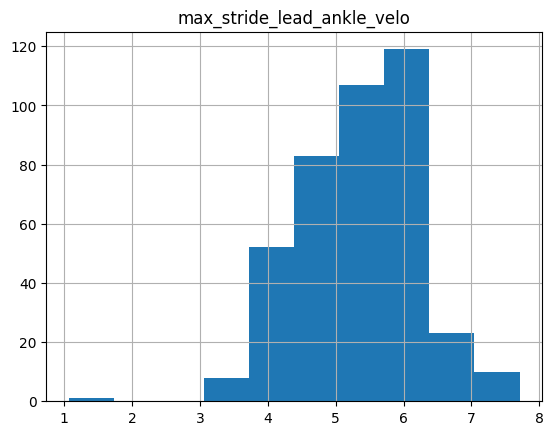

In [1495]:
max_lead_ankle_velo.hist()

In [1496]:
len(poi_train_new.columns), len(poi_val_new.columns), len(poi_test_new.columns)

(214, 214, 214)

In [1497]:
poi_train_new_ankle = poi_train_new.merge(max_lead_ankle_velo, on='session_pitch', how='left')

In [1498]:
poi_val_new_ankle = poi_val_new.merge(max_lead_ankle_velo, on='session_pitch', how='left')
poi_test_new_ankle = poi_test_new.merge(max_lead_ankle_velo, on='session_pitch', how='left')

In [1499]:
len(poi_train_new.columns), len(poi_val_new.columns), len(poi_test_new.columns)

(214, 214, 214)

In [1500]:
x_train=poi_train_new_ankle.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new_ankle.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.155)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9051507445046301
RMSE: 1.414833846002457


Little bit worse

In [1501]:
model = sm.OLS(mph_train, x_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        pitch_speed_mph   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              7977.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):                    6.77e-79
Time:                        19:15:49   Log-Likelihood:                         -152.35
No. Observations:                 257   AIC:                                      728.7
Df Residuals:                      45   BIC:                                      1481.
Df Model:                         212                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================================================
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------
max_shoulder_internal_rotational_velo                                           -0.0030      0.010     -0.303      0.763      -0.023       0.017
max_elbow_extension_velo                                                        -0.0075      0.024     -0.319      0.751      -0.055       0.040
max_torso_rotational_velo                                                        0.1394      0.085      1.632      0.110      -0.033       0.312
max_rotation_hip_shoulder_separation                                             1.7584      0.920      1.911      0.062      -0.095       3.612
max_elbow_flexion                                                                0.0377      1.183      0.032      0.975      -2.344       2.419
max_shoulder_external_rotation                                                   0.5556      1.093      0.509      0.614      -1.645       2.756
elbow_flexion_fp                                                                -0.3737      0.551     -0.678      0.501      -1.484       0.737
elbow_pronation_fp                                                              -0.0158      0.042     -0.374      0.710      -0.101       0.070
rotation_hip_shoulder_separation_fp                                             -1.3853      1.142     -1.213      0.231      -3.685       0.915
shoulder_horizontal_abduction_fp                                                -0.2411      0.214     -1.126      0.266      -0.673       0.190
shoulder_abduction_fp                                                            0.5124      0.555      0.924      0.360      -0.605       1.629
shoulder_external_rotation_fp                                                   -0.0761      0.074     -1.035      0.306      -0.224       0.072
lead_knee_extension_angular_velo_fp                                             -0.0025      0.003     -0.947      0.349      -0.008       0.003
lead_knee_extension_angular_velo_br                                             -0.0074      0.012     -0.627      0.534      -0.031       0.016
lead_knee_extension_angular_velo_max                                            -0.0027      0.013     -0.215      0.831      -0.028       0.023
torso_anterior_tilt_fp                                                           0.0505      0.123      0.410      0.684      -0.198       0.299
torso_lateral_tilt_fp                                                           -0.0713      0.141     -0.505      0.616      -0.356       0.213
torso_rotation_fp                                                               -0.1

In [1502]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
111,thorax_distal_transfer_fp_br_int_elbow_transfe...,0.533206
63,thorax_distal_transfer_fp_br,0.114217
133,FP_to_BR_time_int_FS_to_BR_time,0.037094
47,elbow_transfer_fp_br,0.031610
21,max_cog_velo_x,0.023298
...,...,...
175,arm_slot_2,0.000000
139,max_shoulder_external_rotation_2,0.000000
177,max_shoulder_horizontal_abduction_2,0.000000
178,shoulder_transfer_fp_br_2,0.000000


In [1503]:
importance_df.head(10)

,Feature,Importance
111,thorax_distal_transfer_fp_br_int_elbow_transfe...,0.533206
63,thorax_distal_transfer_fp_br,0.114217
133,FP_to_BR_time_int_FS_to_BR_time,0.037094
47,elbow_transfer_fp_br,0.031610
21,max_cog_velo_x,0.023298
43,max_shoulder_horizontal_abduction,0.020192
89,shoulder_internal_rotation_moment_int_elbow_va...,0.017880
95,lead_knee_extension_from_fp_to_br_int_lead_kne...,0.016732
106,rear_knee_transfer_pkh_fp_int_rear_hip_transfe...,0.013357
102,lead_hip_transfer_fp_br_int_lead_knee_extensio...,0.013144


In [1504]:
importance_df.tail(10)

,Feature,Importance
140,elbow_flexion_fp_2,0.0
170,torso_rotation_br_2,0.0
172,cog_velo_pkh_2,0.0
173,stride_length_2,0.0
114,rear_grf_mag_max_int_rear_grf_z_max,0.0
175,arm_slot_2,0.0
139,max_shoulder_external_rotation_2,0.0
177,max_shoulder_horizontal_abduction_2,0.0
178,shoulder_transfer_fp_br_2,0.0
138,max_elbow_flexion_2,0.0


Kind of suspected that much of the unimportant features would be the squared ones. Makes sense since we didn't put any thought into the individual squared features. Curious to see how many features we can take out without a drop in performance. 

In [1505]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

best_train_cols = x_train.columns
best_val_cols = x_val.columns

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.147)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

R^2: 0.9125950970672566
RMSE: 1.3581770099549213


In [1506]:
for feature in importance_df.tail(10).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)

In [1507]:
linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.147)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9125950970672566
RMSE: 1.3581770099549213


In [1508]:
best_train_cols = x_train.columns
best_val_cols = x_val.columns

In [1509]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(10)

,Feature,Importance
158,glove_shoulder_horizontal_abduction_fp_2,0.0
159,glove_shoulder_abduction_fp_2,0.0
161,glove_shoulder_abduction_mer_2,0.0
162,elbow_flexion_mer_2,0.0
163,torso_anterior_tilt_mer_2,0.0
168,max_shoulder_horizontal_abduction_2,0.0
169,shoulder_transfer_fp_br_2,0.0
170,shoulder_generation_fp_br_2,0.0
171,shoulder_absorption_fp_br_2,0.0
202,session_height_m_2,0.0


In [1510]:
for feature in importance_df.tail(10).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)


In [1511]:

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.147)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9125950970672566
RMSE: 1.3581770099549213


In [1512]:
best_train_cols = x_train.columns
best_val_cols = x_val.columns

In [1513]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(10)

,Feature,Importance
148,lead_knee_extension_angular_velo_max_2,0.0
154,pelvis_rotation_fp_2,0.0
155,max_cog_velo_x_2,0.0
156,torso_rotation_min_2,0.0
157,max_pelvis_rotational_velo_2,0.0
135,max_elbow_extension_velo_2,0.0
164,elbow_generation_fp_br_2,0.0
165,elbow_absorption_fp_br_2,0.0
166,lead_hip_transfer_fp_br_2,0.0
192,session_mass_kg_2,0.0


In [1514]:
for feature in importance_df.tail(10).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)


In [1515]:

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.147)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9125950970672566
RMSE: 1.3581770099549213


In [1516]:
best_train_cols = x_train.columns
best_val_cols = x_val.columns

In [1517]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(10)

,Feature,Importance
144,shoulder_external_rotation_fp_2,0.0
134,max_shoulder_internal_rotational_velo_2,0.0
146,lead_knee_extension_angular_velo_br_2,0.0
132,peak_knee_to_FP_time_int_peak_knee_to_FS_time,0.0
157,elbow_transfer_fp_br_2,0.0
158,lead_hip_generation_fp_br_2,0.0
136,max_rotation_hip_shoulder_separation_2,0.0
160,lead_knee_transfer_fp_br_2,0.0
161,lead_knee_generation_fp_br_2,0.0
182,peak_rfd_lead_2,0.0


In [1518]:
for feature in importance_df.tail(10).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)


In [1519]:

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.147)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9125950970672566
RMSE: 1.3581770099549213


In [1520]:
best_train_cols = x_train.columns
best_val_cols = x_val.columns

In [1521]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(20)

,Feature,Importance
165,rear_grf_mag_max_2,0.0
164,rear_grf_z_max_2,0.0
163,rear_grf_y_max_2,0.0
162,rear_grf_x_max_2,0.0
161,thorax_distal_transfer_fp_br_2,0.0
160,pelvis_lumbar_transfer_fp_br_2,0.0
158,rear_knee_generation_pkh_fp_2,0.0
139,shoulder_horizontal_abduction_fp_2,0.0
157,rear_knee_transfer_pkh_fp_2,0.0
156,rear_hip_absorption_pkh_fp_2,0.0


In [1522]:
for feature in importance_df.tail(20).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)


In [1523]:

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.147)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9125950970672566
RMSE: 1.3581770099549213


In [1524]:
best_train_cols = x_train.columns
best_val_cols = x_val.columns

In [1525]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(20)

,Feature,Importance
96,stride_length_int_max_cog_velo_x,1.335921e-06
117,lead_grf_z_max_int_shoulder_internal_rotation_...,1.002095e-06
30,torso_lateral_tilt_mer,8.803635e-07
143,lead_knee_extension_from_fp_to_br_2,8.433707e-07
104,lead_knee_transfer_fp_br_int_lead_hip_transfer...,5.450750e-07
141,glove_shoulder_external_rotation_fp_2,1.013990e-07
142,torso_lateral_tilt_br_2,6.158894e-08
133,elbow_pronation_fp_2,4.236226e-08
145,timing_peak_torso_to_peak_pelvis_rot_velo_2,2.680844e-08
107,rear_knee_generation_pkh_fp_int_rear_hip_trans...,1.847129e-08


In [1526]:
for feature in importance_df.tail(20).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)



In [1527]:
linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.142)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9127124606875201
RMSE: 1.35726485222381


In [1528]:
best_train_cols = x_train.columns
best_val_cols = x_val.columns

In [1529]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

for feature in importance_df.tail(20).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)


In [1530]:

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.147)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9109421061072338
RMSE: 1.3709596965963553


In [1531]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(20)


,Feature,Importance
20,torso_rotation_min,1.045576e-04
12,lead_knee_extension_angular_velo_max,8.673515e-05
101,session_mass_kg_int_elbow_transfer_fp_br,8.286034e-05
110,pelvis_anterior_tilt_fp_2,7.398157e-05
98,lead_grf_mag_max_int_shoulder_internal_rotatio...,7.268061e-05
111,pelvis_lateral_tilt_fp_2,7.021443e-05
45,lead_hip_generation_fp_br,6.205121e-05
65,lead_grf_angle_at_max,5.738790e-05
44,lead_hip_transfer_fp_br,5.521553e-05
11,lead_knee_extension_angular_velo_br,5.225121e-05


In [1532]:
for feature in importance_df.tail(10).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)


In [1533]:

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.135)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9088430204754189
RMSE: 1.3870222907105343


In [1534]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

for feature in importance_df.tail(10).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)


In [1535]:

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.17)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9067124959785726
RMSE: 1.4031374432231238


Let's stop here for now. Able to drop many features with similar performance

In [1536]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(10)

,Feature,Importance
51,rear_grf_x_max,7.079388e-05
49,pelvis_lumbar_transfer_fp_br,6.917911e-05
85,session_mass_kg_int_elbow_transfer_fp_br,6.597599e-05
17,torso_rotation_min,6.256452e-05
54,rear_grf_mag_max,5.953695e-05
19,glove_shoulder_horizontal_abduction_fp,3.492262e-05
28,cog_velo_pkh,2.815950e-05
39,lead_hip_transfer_fp_br,1.920520e-05
83,rear_grf_mag_max_int_rear_grf_z_max,6.706746e-07
89,torso_anterior_tilt_fp_2,2.924386e-07


In [1537]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.147)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9125950970672566
RMSE: 1.3581770099549213


Drop, double check the numbers above

In [1538]:
best_train_cols = best_train_cols.to_list()

In [1539]:
x_train = x_train[best_train_cols]
x_val = x_val[best_train_cols]

In [1540]:
# x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
# x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.142)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9127124606875201
RMSE: 1.35726485222381


In [1541]:
best_train_cols.append('session_pitch')

poi_train_new = poi_train_new[best_train_cols]
poi_val_new = poi_val_new[best_train_cols]
poi_test_new = poi_test_new[best_train_cols]

In [1542]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [1543]:
importance_df[importance_df.Feature.str.contains('time')]

,Feature,Importance
125,FP_to_BR_time_int_FS_to_BR_time,3.133866e-02
77,peak_knee_to_FS_time,4.279162e-03
123,peak_knee_to_FS_time_int_cog_velo_pkh,2.056339e-03
79,FS_to_BR_time,7.492950e-04
80,FP_to_BR_time,2.414708e-04
78,peak_knee_to_FP_time,2.594087e-05
124,peak_knee_to_FP_time_int_cog_velo_pkh,1.596017e-05
81,total_time,1.201802e-07


In [1544]:
importance_df.head(50)

,Feature,Importance
106,thorax_distal_transfer_fp_br_int_elbow_transfe...,0.476241
61,thorax_distal_transfer_fp_br,0.082075
87,shoulder_internal_rotation_moment_int_elbow_va...,0.055815
125,FP_to_BR_time_int_FS_to_BR_time,0.031339
21,max_cog_velo_x,0.028775
45,elbow_transfer_fp_br,0.027697
69,lead_grf_z_max,0.021679
42,max_shoulder_horizontal_abduction,0.021219
93,lead_knee_extension_from_fp_to_br_int_lead_kne...,0.016901
99,lead_hip_transfer_fp_br_int_lead_knee_extensio...,0.016677


Just making some notes here. Only square feature here is stride angle, but this actually makes intuitive sense. Can see too little or too much being a factor. FS and FP are important enough. I'm weirded out by is that interaction term sitting at 4th most important.

Making a note here, but at the end, we may consider PCA. Only issue is the lack of interpretability for player development purposes. We can see how much it improves performance. Testing out where we are at the moment. Will do a proper grid search later.

In [1545]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.142)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9127124606875201
RMSE: 1.35726485222381


In [1546]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
106,thorax_distal_transfer_fp_br_int_elbow_transfe...,4.762410e-01
61,thorax_distal_transfer_fp_br,8.207522e-02
87,shoulder_internal_rotation_moment_int_elbow_va...,5.581529e-02
125,FP_to_BR_time_int_FS_to_BR_time,3.133866e-02
21,max_cog_velo_x,2.877474e-02
...,...,...
115,lead_grf_mag_max_int_lead_grf_z_max,2.698269e-07
81,total_time,1.201802e-07
85,pelvis_rotation_fp_int_torso_rotation_fp,1.808128e-08
90,torso_lateral_tilt_br_int_torso_lateral_tilt_mer,0.000000e+00


In [1547]:
importance_df[importance_df.Feature.str.contains('velo')]

,Feature,Importance
21,max_cog_velo_x,0.028775
93,lead_knee_extension_from_fp_to_br_int_lead_kne...,0.016901
92,lead_knee_extension_from_fp_to_br_int_lead_kne...,0.006171
23,max_pelvis_rotational_velo,0.003887
0,max_shoulder_internal_rotational_velo,0.003435
123,peak_knee_to_FS_time_int_cog_velo_pkh,0.002056
2,max_torso_rotational_velo,0.000766
1,max_elbow_extension_velo,0.000638
84,lead_knee_extension_angular_velo_max_int_lead_...,0.000450
37,cog_velo_pkh,0.000210


In [1548]:
importance_df[importance_df.Feature.str.contains('max')]

,Feature,Importance
21,max_cog_velo_x,2.877474e-02
69,lead_grf_z_max,2.167920e-02
42,max_shoulder_horizontal_abduction,2.121883e-02
93,lead_knee_extension_from_fp_to_br_int_lead_kne...,1.690114e-02
107,rear_grf_z_max_int_rear_grf_x_max,1.485500e-02
121,session_mass_kg_int_rear_grf_z_max,1.231992e-02
66,rear_grf_angle_at_max,1.119706e-02
95,max_shoulder_horizontal_abduction_int_shoulder...,9.936084e-03
76,max_lead_knee_jc_z,6.741644e-03
23,max_pelvis_rotational_velo,3.886966e-03


In [1549]:
# cog vs back foot x location at pkh and squared term, inter term between this and cog_velo_pkh
peak_leg_lift_time = peak_leg_lift_time.merge(landmarks, left_on=['session_pitch', 'peak_knee_time'], right_on=['session_pitch', 'time'], how='left')
peak_leg_lift_time

,session_pitch,max_lead_knee_jc_z,peak_knee_time,time,rear_ankle_jc_x,rear_ankle_jc_y,rear_ankle_jc_z,rear_hip_x,rear_hip_y,rear_hip_z,...,thorax_prox_z,centerofmass_x,centerofmass_y,centerofmass_z,pkh_time,fp_10_time,fp_100_time,MER_time,BR_time,MIR_time
0,1031_2,1.1610,0.6250,0.6250,0.0854,-0.1637,0.0588,0.1763,-0.1076,0.9253,...,1.5648,0.2251,-0.2640,1.1838,0.6250,1.1806,1.1917,1.3056,1.3389,1.3778
1,1031_3,1.1455,0.0917,0.0917,0.0852,-0.1224,0.0582,0.1449,-0.0365,0.9222,...,1.5666,0.2099,-0.1847,1.1787,0.0917,0.6639,0.6806,0.7917,0.8250,0.8611
2,1097_1,1.2528,0.1056,0.1056,0.0670,-0.0772,0.0572,0.1427,-0.0310,0.9547,...,1.5881,0.1702,-0.1675,1.2154,0.1056,0.7722,0.8278,0.9722,1.0028,1.0500
3,1097_2,1.3346,0.1722,0.1722,0.0687,-0.0722,0.0566,0.1128,-0.0512,0.9804,...,1.5998,0.1542,-0.1690,1.2428,0.1722,0.8528,0.8917,1.0306,1.0611,1.1083
4,1097_3,1.3434,0.1472,0.1472,0.0754,-0.0802,0.0574,0.1415,-0.0538,0.9762,...,1.5990,0.1653,-0.1679,1.2435,0.1472,0.8361,0.8472,1.0028,1.0306,1.0778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,3252_1,1.1282,1.1250,1.1250,0.0894,-0.2624,0.0758,0.1335,-0.2528,0.9503,...,1.5268,0.1491,-0.3333,1.1662,1.1250,1.7556,1.7722,1.8861,1.9167,1.9500
407,3252_2,1.1912,0.8583,0.8583,0.0900,-0.2708,0.0770,0.1176,-0.2694,0.9507,...,1.5211,0.1437,-0.3413,1.1705,0.8583,1.5111,1.5250,1.6444,1.6722,1.7083
408,3252_3,1.1596,0.8944,0.8944,0.0842,-0.2321,0.0772,0.1442,-0.2016,0.9452,...,1.5131,0.1626,-0.2840,1.1615,0.8944,1.5306,1.5444,1.6583,1.6889,1.7250
409,3252_4,1.1912,0.6250,0.6250,0.0864,-0.2446,0.0764,0.1272,-0.2310,0.9554,...,1.5247,0.1523,-0.3079,1.1716,0.6250,1.2861,1.3083,1.4139,1.4444,1.4778


In [1550]:
peak_leg_lift_time['cog_back_foot_diff_pkh'] = peak_leg_lift_time.centerofmass_x - peak_leg_lift_time.rear_ankle_jc_x

In [1551]:
joint_angles.rear_knee_angle_x

0         27.8440
1         28.0164
2         28.1834
3         28.3388
4         28.4780
           ...   
247704    65.7704
247705    65.8856
247706    65.9629
247707    66.0106
247708    66.0372
Name: rear_knee_angle_x, Length: 247709, dtype: float64

In [1552]:
peak_leg_lift_time = peak_leg_lift_time.merge(joint_angles[['session_pitch', 'time', 'rear_knee_angle_x']], on=['session_pitch', 'time'], how='left')

In [1553]:
peak_leg_lift_time.rename(columns={'rear_knee_angle_x': 'rear_knee_angle_pkh'}, inplace=True)

In [1554]:
cog_and_knee = peak_leg_lift_time[['session_pitch', 'cog_back_foot_diff_pkh', 'rear_knee_angle_pkh']]
poi_train_new_cog_knee = poi_train_new.merge(cog_and_knee, on='session_pitch', how='left')
poi_val_new_cog_knee = poi_val_new.merge(cog_and_knee, on='session_pitch', how='left')
poi_test_new_cog_knee = poi_test_new.merge(cog_and_knee, on='session_pitch', how='left')

In [1555]:
x_train=poi_train_new_cog_knee.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new_cog_knee.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.15)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9036139541920258
RMSE: 1.4262496779647968


In [1556]:
poi_train_new_cog_knee['cog_back_foot_diff_pkh_2'] = poi_train_new_cog_knee.cog_back_foot_diff_pkh**2
poi_train_new_cog_knee['rear_knee_angle_pkh_2'] = poi_train_new_cog_knee.rear_knee_angle_pkh**2

poi_val_new_cog_knee['cog_back_foot_diff_pkh_2'] = poi_val_new_cog_knee.cog_back_foot_diff_pkh**2
poi_val_new_cog_knee['rear_knee_angle_pkh_2'] = poi_val_new_cog_knee.rear_knee_angle_pkh**2

poi_test_new_cog_knee['cog_back_foot_diff_pkh_2'] = poi_test_new_cog_knee.cog_back_foot_diff_pkh**2
poi_test_new_cog_knee['rear_knee_angle_pkh_2'] = poi_test_new_cog_knee.rear_knee_angle_pkh**2

In [1557]:
x_train=poi_train_new_cog_knee.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new_cog_knee.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.15)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9036139541920258
RMSE: 1.4262496779647968


In [1558]:
x_train.drop(columns=['rear_knee_angle_pkh', 'rear_knee_angle_pkh_2'], inplace=True)
x_val.drop(columns=['rear_knee_angle_pkh', 'rear_knee_angle_pkh_2'], inplace=True)

# x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
# x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)


In [1559]:

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.15)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9100806953513625
RMSE: 1.3775740314023002


In [1560]:
# poi_train_new.drop(columns=['cog_back_foot_diff_pkh'], inplace=True)
# poi_val_new.drop(columns=['cog_back_foot_diff_pkh'], inplace=True)

x_train=x_train.drop(columns=['cog_back_foot_diff_pkh'], axis=1)
x_val = x_val.drop(columns=['cog_back_foot_diff_pkh'], axis=1)


In [1561]:

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.147)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9117478643390317
RMSE: 1.3647436723383957


In [1562]:
# poi_train_new.drop(columns=['cog_back_foot_diff_pkh_2'], inplace=True)
# poi_val_new.drop(columns=['cog_back_foot_diff_pkh_2'], inplace=True)

x_train=x_train.drop(columns=['cog_back_foot_diff_pkh_2'], axis=1)
x_val = x_val.drop(columns=['cog_back_foot_diff_pkh_2'], axis=1)


In [1563]:

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.142)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9127124606875201
RMSE: 1.35726485222381


In [1564]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 12, reg_lambda = 1.142)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9068096019222158
RMSE: 1.402406967781086


In [1565]:
from sklearn.model_selection import GridSearchCV

In [1566]:
poi_train_new_rear_knee = poi_train_new.merge(cog_and_knee[['session_pitch', 'rear_knee_angle_pkh']], on='session_pitch', how='left')
poi_val_new_rear_knee = poi_val_new.merge(cog_and_knee[['session_pitch', 'rear_knee_angle_pkh']], on='session_pitch', how='left')
poi_test_new_rear_knee = poi_test_new.merge(cog_and_knee[['session_pitch', 'rear_knee_angle_pkh']], on='session_pitch', how='left')
poi_train_new_rear_knee['rear_knee_angle_pkh_2'] = poi_train_new_rear_knee.rear_knee_angle_pkh**2
poi_val_new_rear_knee['rear_knee_angle_pkh_2'] = poi_val_new_rear_knee.rear_knee_angle_pkh**2
poi_test_new_rear_knee['rear_knee_angle_pkh_2'] = poi_test_new_rear_knee.rear_knee_angle_pkh**2

x_train=poi_train_new_rear_knee.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new_rear_knee.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.15)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.901364306113388
RMSE: 1.4427979928246941


In [1567]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.head(50)

,Feature,Importance
106,thorax_distal_transfer_fp_br_int_elbow_transfe...,0.506327
61,thorax_distal_transfer_fp_br,0.139281
87,shoulder_internal_rotation_moment_int_elbow_va...,0.031354
125,FP_to_BR_time_int_FS_to_BR_time,0.026268
132,stride_angle_2,0.020473
42,max_shoulder_horizontal_abduction,0.020422
32,shoulder_internal_rotation_moment,0.019501
45,elbow_transfer_fp_br,0.018458
93,lead_knee_extension_from_fp_to_br_int_lead_kne...,0.017740
99,lead_hip_transfer_fp_br_int_lead_knee_extensio...,0.017440


The fact that there is rear_knee_absorption_pkh probably takes the effect away from rear_knee_angle_pkh. The former is likely a better indicator anyways, as it seems to be more important to the XGB. The presence of rear_knee_angle_pkh diminished the importance of absorption just a tad. Also diminishes performance. Not by much, but for something that may be unnecessary we don't want to take that trade.

In [1568]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(n_estimators = 60, max_depth = 8, reg_lambda = 1.142)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9127124606875201
RMSE: 1.35726485222381


Just a note that we can use less estimators

In [1569]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.head(50)

,Feature,Importance
106,thorax_distal_transfer_fp_br_int_elbow_transfe...,0.476241
61,thorax_distal_transfer_fp_br,0.082075
87,shoulder_internal_rotation_moment_int_elbow_va...,0.055815
125,FP_to_BR_time_int_FS_to_BR_time,0.031339
21,max_cog_velo_x,0.028775
45,elbow_transfer_fp_br,0.027697
69,lead_grf_z_max,0.021679
42,max_shoulder_horizontal_abduction,0.021219
93,lead_knee_extension_from_fp_to_br_int_lead_kne...,0.016901
99,lead_hip_transfer_fp_br_int_lead_knee_extensio...,0.016677


peak_knee_to_FS_time is decently important, FP_to_BR_time is meh. Gonna have to think about why FP_to_BR_time_int_FS_to_BR_time is so important. Good amount of interaction terms up here

In [1570]:
importance_df

,Feature,Importance
106,thorax_distal_transfer_fp_br_int_elbow_transfe...,4.762410e-01
61,thorax_distal_transfer_fp_br,8.207522e-02
87,shoulder_internal_rotation_moment_int_elbow_va...,5.581529e-02
125,FP_to_BR_time_int_FS_to_BR_time,3.133866e-02
21,max_cog_velo_x,2.877474e-02
...,...,...
115,lead_grf_mag_max_int_lead_grf_z_max,2.698269e-07
81,total_time,1.201802e-07
85,pelvis_rotation_fp_int_torso_rotation_fp,1.808128e-08
90,torso_lateral_tilt_br_int_torso_lateral_tilt_mer,0.000000e+00


In [1571]:
for i, feature in enumerate(importance_df.head(20).Feature):
    if feature not in poi_train.columns:
        print(str(i+1) + ': ' + feature)

1: thorax_distal_transfer_fp_br_int_elbow_transfer_fp_br
3: shoulder_internal_rotation_moment_int_elbow_varus_moment
4: FP_to_BR_time_int_FS_to_BR_time
9: lead_knee_extension_from_fp_to_br_int_lead_knee_extension_angular_velo_max
10: lead_hip_transfer_fp_br_int_lead_knee_extension_from_fp_to_br
11: rear_grf_z_max_int_rear_grf_x_max
12: stride_angle_2
13: session_mass_kg_int_rear_grf_z_max
14: thorax_distal_transfer_fp_br_int_shoulder_internal_rotation_moment
16: max_shoulder_horizontal_abduction_int_shoulder_horizontal_abduction_fp
19: rear_knee_transfer_pkh_fp_int_rear_hip_transfer_pkh_fp


5 out of top 10 and 11 out of top 20 are new features. All of these important new terms are non-linear - only one is higher order, others are interaction terms

In [1572]:
importance_df[(importance_df.Feature.str.contains('hip')) | importance_df.Feature.str.contains('cog')]

,Feature,Importance
21,max_cog_velo_x,0.028775
99,lead_hip_transfer_fp_br_int_lead_knee_extensio...,0.016677
102,rear_knee_transfer_pkh_fp_int_rear_hip_transfe...,0.008449
50,lead_hip_absorption_fp_br,0.002123
123,peak_knee_to_FS_time_int_cog_velo_pkh,0.002056
3,max_rotation_hip_shoulder_separation,0.000801
48,lead_hip_transfer_fp_br,0.000254
56,rear_hip_absorption_pkh_fp,0.000241
37,cog_velo_pkh,0.000210
55,rear_hip_generation_pkh_fp,0.000159


Going to see how the cog position in the plane perpendicular to home effects velo here. Idea is seeing how someone is sitting into their rear leg. Also worth trying the hip position. We already tried the relative position to the ankle for cog in the x direction, so now we can try in the y direction. One thing to note is the rear_hip_absorption_pkh_fp might be covering this, but it is a pretty insignificant feature to the model.

In [1573]:
pkh_FP_landmarks.columns

Index(['session_pitch', 'time', 'rear_ankle_jc_x', 'rear_ankle_jc_y',
       'rear_ankle_jc_z', 'rear_hip_x', 'rear_hip_y', 'rear_hip_z',
       'elbow_jc_x', 'elbow_jc_y', 'elbow_jc_z', 'hand_jc_x', 'hand_jc_y',
       'hand_jc_z', 'rear_knee_jc_x', 'rear_knee_jc_y', 'rear_knee_jc_z',
       'shoulder_jc_x', 'shoulder_jc_y', 'shoulder_jc_z', 'wrist_jc_x',
       'wrist_jc_y', 'wrist_jc_z', 'lead_ankle_jc_x', 'lead_ankle_jc_y',
       'lead_ankle_jc_z', 'lead_hip_x', 'lead_hip_y', 'lead_hip_z',
       'glove_elbow_jc_x', 'glove_elbow_jc_y', 'glove_elbow_jc_z',
       'glove_hand_jc_x', 'glove_hand_jc_y', 'glove_hand_jc_z',
       'lead_knee_jc_x', 'lead_knee_jc_y', 'lead_knee_jc_z',
       'glove_shoulder_jc_x', 'glove_shoulder_jc_y', 'glove_shoulder_jc_z',
       'glove_wrist_jc_x', 'glove_wrist_jc_y', 'glove_wrist_jc_z',
       'thorax_ap_x', 'thorax_ap_y', 'thorax_ap_z', 'thorax_dist_x',
       'thorax_dist_y', 'thorax_dist_z', 'thorax_prox_x', 'thorax_prox_y',
       'thorax_prox_z

In [1574]:
mock_p_throws = all_merged[['session_pitch', 'p_throws']]
mock_p_throws.p_throws = np.where(mock_p_throws.p_throws == 0, -1, 1)
mock_p_throws = mock_p_throws.drop_duplicates()
mock_p_throws

,session_pitch,p_throws
0,1031_2,1
550,1031_3,1
917,1097_1,1
1348,1097_2,1
1794,1097_3,1
...,...,...
244400,3252_1,1
245147,3252_2,1
245801,3252_3,1
246478,3252_4,1


In [1575]:
pkh_FP_landmarks = pkh_FP_landmarks.merge(mock_p_throws, on='session_pitch', how='left')

In [1576]:
pkh_FP_landmarks

,session_pitch,time,rear_ankle_jc_x,rear_ankle_jc_y,rear_ankle_jc_z,rear_hip_x,rear_hip_y,rear_hip_z,elbow_jc_x,elbow_jc_y,...,fp_10_time,fp_100_time,MER_time,BR_time,MIR_time,lead_ankle_velo,prev_time,next_time,ankle_dist,p_throws
0,1031_2,0.6250,0.0854,-0.1637,0.0588,0.1763,-0.1076,0.9253,-0.1232,-0.3015,...,1.1806,1.1917,1.3056,1.3389,1.3778,NaN,NaN,0.6278,NaN,1
1,1031_2,0.6278,0.0855,-0.1638,0.0588,0.1785,-0.1074,0.9245,-0.1219,-0.3016,...,1.1806,1.1917,1.3056,1.3389,1.3778,1.151751,0.6250,0.6306,0.006450,1
2,1031_2,0.6306,0.0855,-0.1638,0.0589,0.1807,-0.1075,0.9236,-0.1207,-0.3016,...,1.1806,1.1917,1.3056,1.3389,1.3778,1.192955,0.6278,0.6333,0.006561,1
3,1031_2,0.6333,0.0856,-0.1639,0.0589,0.1830,-0.1076,0.9227,-0.1194,-0.3017,...,1.1806,1.1917,1.3056,1.3389,1.3778,1.235695,0.6306,0.6361,0.006796,1
4,1031_2,0.6361,0.0857,-0.1639,0.0590,0.1853,-0.1079,0.9218,-0.1182,-0.3017,...,1.1806,1.1917,1.3056,1.3389,1.3778,1.240525,0.6333,0.6389,0.006947,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94025,3252_5,1.4167,0.1799,-0.2928,0.0891,0.8278,-0.1410,0.6287,0.6784,0.1869,...,1.4139,1.4278,1.5500,1.5778,1.6139,1.496221,1.4139,1.4194,0.008229,1
94026,3252_5,1.4194,0.1840,-0.2928,0.0907,0.8347,-0.1449,0.6280,0.6765,0.1815,...,1.4139,1.4278,1.5500,1.5778,1.6139,1.456703,1.4167,1.4222,0.008012,1
94027,3252_5,1.4222,0.1883,-0.2925,0.0925,0.8417,-0.1489,0.6272,0.6743,0.1753,...,1.4139,1.4278,1.5500,1.5778,1.6139,1.395716,1.4194,1.4250,0.007816,1
94028,3252_5,1.4250,0.1926,-0.2922,0.0945,0.8487,-0.1530,0.6265,0.6717,0.1683,...,1.4139,1.4278,1.5500,1.5778,1.6139,1.303816,1.4222,1.4278,0.007301,1


In [1577]:
pkh_FP_landmarks['cog_rear_ankle_y_diff'] = (pkh_FP_landmarks.centerofmass_y - pkh_FP_landmarks.rear_ankle_jc_y) * pkh_FP_landmarks.p_throws
pkh_FP_landmarks['rear_hip_ankle_y_diff'] = (pkh_FP_landmarks.rear_hip_y - pkh_FP_landmarks.rear_ankle_jc_y) * pkh_FP_landmarks.p_throws

In [1578]:
max_y_diff = pkh_FP_landmarks[['session_pitch', 'cog_rear_ankle_y_diff', 'rear_hip_ankle_y_diff']].groupby('session_pitch').max().reset_index()
max_y_diff

,session_pitch,cog_rear_ankle_y_diff,rear_hip_ankle_y_diff
0,1031_2,-0.1003,0.0641
1,1031_3,-0.0336,0.1050
2,1097_1,-0.0805,0.1043
3,1097_2,-0.0614,0.1226
4,1097_3,-0.0701,0.1306
...,...,...,...
398,3252_1,0.0748,0.1366
399,3252_2,0.1158,0.1739
400,3252_3,0.0904,0.1599
401,3252_4,0.1205,0.1839


In [1579]:
poi_train_new_y_diff = poi_train_new.merge(max_y_diff, on='session_pitch', how='left')
poi_val_new_y_diff = poi_val_new.merge(max_y_diff, on='session_pitch', how='left')
poi_test_new_y_diff = poi_test_new.merge(max_y_diff, on='session_pitch', how='left')

In [1580]:
x_train=poi_train_new_y_diff.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new_y_diff.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.135)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9110119767811261
RMSE: 1.37042179552361


In [1581]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df[importance_df.Feature.str.contains('y_diff')]

,Feature,Importance
134,rear_hip_ankle_y_diff,0.001386
133,cog_rear_ankle_y_diff,0.000003


In [1582]:
importance_df.tail(30)

,Feature,Importance
97,elbow_absorption_fp_br_int_shoulder_generation...,5.145524e-05
86,torso_rotation_mer_int_torso_anterior_tilt_mer,4.866886e-05
111,lead_grf_z_max_int_elbow_varus_moment,3.726568e-05
25,glove_shoulder_abduction_fp,2.441941e-05
11,shoulder_external_rotation_fp,2.388694e-05
20,pelvis_rotation_fp,2.298963e-05
126,lead_knee_extension_angular_velo_fp_2,1.967753e-05
68,lead_grf_y_max,1.960928e-05
123,peak_knee_to_FS_time_int_cog_velo_pkh,1.279616e-05
124,peak_knee_to_FP_time_int_cog_velo_pkh,1.212532e-05


In [1583]:
x_train=poi_train_new_y_diff.drop(columns=['session_pitch', 'cog_rear_ankle_y_diff'], axis=1)
x_val = poi_val_new_y_diff.drop(columns=['session_pitch', 'cog_rear_ankle_y_diff'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.133)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9109560828688739
RMSE: 1.3708521130463518


In [1584]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.134)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9132004582824256
RMSE: 1.353465510858427


In [1585]:
new_corr_matrix = x_train.corr()

new_high_corr_pairs = []
new_inter_features = []

for i in range(len(new_corr_matrix.columns)):
    for j in range(i):
        if (abs(new_corr_matrix.iloc[i, j]) > 0.7) & ('int' not in new_corr_matrix.columns[i]) & ('int' not in new_corr_matrix.columns[j]):  # assuming a threshold of 0.6 for high correlation
            if new_corr_matrix.columns[i] + '_int_' + new_corr_matrix.columns[j] not in poi_train_new.columns and new_corr_matrix.columns[j] + '_int_' + new_corr_matrix.columns[i] not in poi_train_new.columns:
                colname = new_corr_matrix.columns[i] + '_int_' + new_corr_matrix.columns[j]  # Name of the new interaction column
                new_inter_features.append(colname)
                new_high_corr_pairs.append((new_corr_matrix.columns[i], new_corr_matrix.columns[j], new_corr_matrix.iloc[i, j]))

new_high_corr_df = pd.DataFrame(new_high_corr_pairs, columns=['Feature1', 'Feature2', 'Correlation'])
new_high_corr_df

,Feature1,Feature2,Correlation
0,stride_length,max_cog_velo_x,0.734195
1,lead_knee_transfer_fp_br,lead_hip_transfer_fp_br,0.767231
2,rear_knee_generation_pkh_fp,rear_hip_transfer_pkh_fp,0.782199
3,peak_knee_to_FP_time,peak_knee_to_FS_time,0.989333
4,torso_anterior_tilt_fp_2,torso_anterior_tilt_fp,-0.781556
5,pelvis_anterior_tilt_fp_2,pelvis_anterior_tilt_fp,0.831634


In [1586]:
poi_train_new_ints = poi_train_new.copy()
poi_val_new_ints = poi_val_new.copy()
poi_test_new_ints = poi_test_new.copy()
for i, features in new_high_corr_df[:-1].iterrows():
    if not ((features.Feature1 == features.Feature2[:-2]) or (features.Feature2 == features.Feature1[:-2])):
        poi_train_new_ints[features.Feature1 + '_int_' + features.Feature2] = poi_train_new_ints[features.Feature1] * poi_train_new_ints[features.Feature2]
        poi_val_new_ints[features.Feature1 + '_int_' + features.Feature2] = poi_val_new_ints[features.Feature1] * poi_val_new_ints[features.Feature2]
        poi_test_new_ints[features.Feature1 + '_int_' + features.Feature2] = poi_test_new_ints[features.Feature1] * poi_test_new_ints[features.Feature2]

In [1587]:
x_train=poi_train_new_ints.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new_ints.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.131) # 8, 1.131
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9163803856556291
RMSE: 1.3284418768562463


In [1588]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(10)

,Feature,Importance
124,peak_knee_to_FP_time_int_cog_velo_pkh,1.108793e-06
86,torso_rotation_mer_int_torso_anterior_tilt_mer,1.049940e-06
108,rear_grf_mag_max_int_rear_grf_x_max,3.887205e-07
122,session_mass_kg_int_rear_grf_mag_max,3.526293e-07
49,lead_hip_generation_fp_br,3.063309e-07
81,total_time,2.833435e-07
113,lead_grf_mag_max_int_shoulder_internal_rotatio...,8.151066e-08
114,lead_grf_mag_max_int_lead_grf_x_max,1.899470e-08
115,lead_grf_mag_max_int_lead_grf_z_max,5.766586e-09
136,peak_knee_to_FP_time_int_peak_knee_to_FS_time,2.185607e-09


In [1589]:
len(importance_df)

137

Least important variables. Were probably in the model before but got cut during that big cut.

In [1590]:
for i, feature in importance_df.tail(6).iterrows():
    poi_train_new_ints.drop(columns=feature.Feature, axis=1, inplace=True)
    poi_val_new_ints.drop(columns=feature.Feature, axis=1, inplace=True)
    poi_test_new_ints.drop(columns=feature.Feature, axis=1, inplace=True)

In [1591]:
x_train=poi_train_new_ints.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new_ints.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.131)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9161485986249579
RMSE: 1.3302817712171806


In [1592]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(10)

,Feature,Importance
86,torso_anterior_tilt_br_int_torso_anterior_tilt...,7.533052e-06
129,lead_knee_transfer_fp_br_int_lead_hip_transfer...,5.141471e-06
114,session_mass_kg_int_thorax_distal_transfer_fp_br,3.228152e-06
119,peak_knee_to_FP_time_int_cog_velo_pkh,2.995675e-06
84,torso_rotation_mer_int_torso_anterior_tilt_mer,2.186160e-06
108,lead_grf_y_max_int_stride_angle,2.165565e-06
88,torso_lateral_tilt_br_int_torso_lateral_tilt_mer,1.894945e-06
117,session_mass_kg_int_rear_grf_mag_max,3.329140e-07
106,rear_grf_mag_max_int_rear_grf_x_max,3.153341e-07
82,lead_knee_extension_angular_velo_max_int_lead_...,1.168225e-08


In [1593]:
len(importance_df)

131

In [1594]:
poi_train_new = poi_train_new_ints.copy()
poi_val_new = poi_val_new_ints.copy()
poi_test_new = poi_test_new_ints.copy()

In [1595]:
len(poi_train_new.columns), len(poi_val_new.columns), len(poi_test_new.columns)

(132, 132, 132)

Look at comparison between pacing during leg lift and pacing after. Look at pace of change of direction at pkh (2nd derivative) - calculate derivative, then derivative of derivative

In [1596]:
landmarks['prev_time'] = landmarks['time'].shift(1)
landmarks['next_time'] = landmarks['time'].shift(-1)
landmarks['prev_lead_knee_jc_z'] = landmarks['lead_knee_jc_z'].shift(1)
landmarks['next_lead_knee_jc_z'] = landmarks['lead_knee_jc_z'].shift(-1)

landmarks['lead_knee_velo'] = (landmarks['next_lead_knee_jc_z'] - landmarks['prev_lead_knee_jc_z']) / (landmarks['next_time'] - landmarks['prev_time'])

landmarks['lead_knee_velo'] = np.where(
    (landmarks['time'] == 0) |
    (landmarks['next_time'] == 0) |
    (landmarks.index == len(landmarks) - 1),
    np.NaN,
    landmarks['lead_knee_velo']
)

landmarks['prev_knee_velo'] = landmarks['lead_knee_velo'].shift(1)
landmarks['next_knee_velo'] = landmarks['lead_knee_velo'].shift(-1)

landmarks['lead_knee_acc'] = (landmarks['next_knee_velo'] - landmarks['prev_knee_velo']) / (landmarks['next_time'] - landmarks['prev_time'])

landmarks['lead_knee_acc'] = np.where(
    (landmarks['time'] == 0) |
    (landmarks['next_time'] == 0) |
    (landmarks.index == len(landmarks) - 1),
    np.NaN,
    landmarks['lead_knee_acc']
)

landmarks = landmarks.drop(columns=['prev_time', 'next_time', 'prev_lead_knee_jc_z', 'next_lead_knee_jc_z', 'prev_knee_velo', 'next_knee_velo'])

In [1597]:
landmarks

,session_pitch,time,rear_ankle_jc_x,rear_ankle_jc_y,rear_ankle_jc_z,rear_hip_x,rear_hip_y,rear_hip_z,elbow_jc_x,elbow_jc_y,...,centerofmass_y,centerofmass_z,pkh_time,fp_10_time,fp_100_time,MER_time,BR_time,MIR_time,lead_knee_velo,lead_knee_acc
0,1031_2,0.0000,0.0719,-0.1806,0.0622,-0.0345,-0.1740,0.9830,-0.1766,-0.2383,...,-0.1556,1.1440,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,NaN,NaN
1,1031_2,0.0028,0.0720,-0.1806,0.0623,-0.0343,-0.1738,0.9832,-0.1764,-0.2382,...,-0.1562,1.1458,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,0.035714,NaN
2,1031_2,0.0056,0.0719,-0.1806,0.0624,-0.0342,-0.1736,0.9833,-0.1762,-0.2380,...,-0.1563,1.1459,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,0.036364,0.118064
3,1031_2,0.0083,0.0719,-0.1806,0.0624,-0.0341,-0.1734,0.9835,-0.1762,-0.2378,...,-0.1564,1.1459,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,0.036364,-3.364817
4,1031_2,0.0111,0.0718,-0.1805,0.0624,-0.0341,-0.1732,0.9836,-0.1762,-0.2377,...,-0.1566,1.1460,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,0.017857,-6.493506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247704,3252_5,1.7528,0.7124,-0.4337,0.7062,1.4425,-0.2609,0.8528,1.4963,0.1718,...,-0.0296,0.9630,0.800,1.4139,1.4278,1.5500,1.5778,1.6139,0.035714,-3.130798
247705,3252_5,1.7556,0.7193,-0.4447,0.7169,1.4456,-0.2594,0.8554,1.4979,0.1699,...,-0.0290,0.9657,0.800,1.4139,1.4278,1.5500,1.5778,1.6139,0.018182,-3.187721
247706,3252_5,1.7583,0.7261,-0.4550,0.7268,1.4485,-0.2579,0.8577,1.4998,0.1686,...,-0.0285,0.9682,0.800,1.4139,1.4278,1.5500,1.5778,1.6139,0.018182,-3.305785
247707,3252_5,1.7611,0.7325,-0.4643,0.7359,1.4514,-0.2565,0.8598,1.5018,0.1677,...,-0.0279,0.9703,0.800,1.4139,1.4278,1.5500,1.5778,1.6139,0.000000,NaN


In [1598]:
peak_leg_lift_time = peak_leg_lift_time.merge(landmarks[['session_pitch', 'time', 'lead_knee_velo', 'lead_knee_acc']], on=['session_pitch', 'time'], how='left')

In [1599]:
peak_leg_lift_time.rename(columns={'lead_knee_velo': 'lead_knee_velo_pkh', 'lead_knee_acc': 'lead_knee_acc_pkh'}, inplace=True)

In [1600]:
peak_leg_lift_time

,session_pitch,max_lead_knee_jc_z,peak_knee_time,time,rear_ankle_jc_x,rear_ankle_jc_y,rear_ankle_jc_z,rear_hip_x,rear_hip_y,rear_hip_z,...,pkh_time,fp_10_time,fp_100_time,MER_time,BR_time,MIR_time,cog_back_foot_diff_pkh,rear_knee_angle_pkh,lead_knee_velo_pkh,lead_knee_acc_pkh
0,1031_2,1.1610,0.6250,0.6250,0.0854,-0.1637,0.0588,0.1763,-0.1076,0.9253,...,0.6250,1.1806,1.1917,1.3056,1.3389,1.3778,0.1397,46.8681,-0.017857,-31.887755
1,1031_3,1.1455,0.0917,0.0917,0.0852,-0.1224,0.0582,0.1449,-0.0365,0.9222,...,0.0917,0.6639,0.6806,0.7917,0.8250,0.8611,0.1247,47.5162,-0.018182,-32.880756
2,1097_1,1.2528,0.1056,0.1056,0.0670,-0.0772,0.0572,0.1427,-0.0310,0.9547,...,0.1056,0.7722,0.8278,0.9722,1.0028,1.0500,0.1032,41.4317,0.036364,-26.092090
3,1097_2,1.3346,0.1722,0.1722,0.0687,-0.0722,0.0566,0.1128,-0.0512,0.9804,...,0.1722,0.8528,0.8917,1.0306,1.0611,1.1083,0.0855,25.0530,-0.017857,-25.684137
4,1097_3,1.3434,0.1472,0.1472,0.0754,-0.0802,0.0574,0.1415,-0.0538,0.9762,...,0.1472,0.8361,0.8472,1.0028,1.0306,1.0778,0.0899,26.4948,0.035714,-29.046846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,3252_1,1.1282,1.1250,1.1250,0.0894,-0.2624,0.0758,0.1335,-0.2528,0.9503,...,1.1250,1.7556,1.7722,1.8861,1.9167,1.9500,0.0597,34.5402,0.000000,-25.510204
407,3252_2,1.1912,0.8583,0.8583,0.0900,-0.2708,0.0770,0.1176,-0.2694,0.9507,...,0.8583,1.5111,1.5250,1.6444,1.6722,1.7083,0.0537,35.3750,0.000000,-29.515939
408,3252_3,1.1596,0.8944,0.8944,0.0842,-0.2321,0.0772,0.1442,-0.2016,0.9452,...,0.8944,1.5306,1.5444,1.6583,1.6889,1.7250,0.0784,37.8113,0.000000,-39.315230
409,3252_4,1.1912,0.6250,0.6250,0.0864,-0.2446,0.0764,0.1272,-0.2310,0.9554,...,0.6250,1.2861,1.3083,1.4139,1.4444,1.4778,0.0659,34.5252,-0.017857,-38.265306


In [1601]:
poi_train_new_knee = poi_train_new.merge(peak_leg_lift_time[['session_pitch', 'lead_knee_acc_pkh']], on='session_pitch', how='left')
poi_val_new_knee = poi_val_new.merge(peak_leg_lift_time[['session_pitch', 'lead_knee_acc_pkh']], on='session_pitch', how='left')
poi_test_new_knee = poi_test_new.merge(peak_leg_lift_time[['session_pitch', 'lead_knee_acc_pkh']], on='session_pitch', how='left')

In [1602]:
x_train=poi_train_new_knee.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new_knee.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.132)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.915370198532403
RMSE: 1.3364420701915103


In [1603]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(10)

,Feature,Importance
57,rear_knee_generation_pkh_fp,3.653102e-06
88,torso_lateral_tilt_br_int_torso_lateral_tilt_mer,1.008388e-06
119,peak_knee_to_FP_time_int_cog_velo_pkh,5.764499e-07
129,lead_knee_transfer_fp_br_int_lead_hip_transfer...,3.895685e-07
108,lead_grf_y_max_int_stride_angle,9.350599e-08
115,session_mass_kg_int_rear_grf_x_max,1.899507e-08
84,torso_rotation_mer_int_torso_anterior_tilt_mer,5.839269e-09
106,rear_grf_mag_max_int_rear_grf_x_max,2.881319e-09
117,session_mass_kg_int_rear_grf_mag_max,0.000000e+00
86,torso_anterior_tilt_br_int_torso_anterior_tilt...,0.000000e+00


In [1604]:
importance_df[importance_df.Feature == 'lead_knee_acc_pkh']

,Feature,Importance
131,lead_knee_acc_pkh,0.000023


In [1605]:
for i, feature in importance_df.tail(6).iterrows():
    poi_train_new_knee.drop(columns=feature.Feature, axis=1, inplace=True)
    poi_val_new_knee.drop(columns=feature.Feature, axis=1, inplace=True)
    poi_test_new_knee.drop(columns=feature.Feature, axis=1, inplace=True)

In [1606]:
x_train=poi_train_new_knee.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new_knee.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.131)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9156562155648124
RMSE: 1.3341818220486117


In [1607]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(10)

,Feature,Importance
82,lead_knee_extension_angular_velo_max_int_lead_...,1.393432e-05
118,torso_rotation_fp_2,1.312476e-05
31,elbow_varus_moment,1.170345e-05
25,glove_shoulder_abduction_fp,8.234744e-06
41,timing_peak_torso_to_peak_pelvis_rot_velo,7.299279e-06
110,session_mass_kg_int_thorax_distal_transfer_fp_br,5.512257e-06
57,rear_knee_generation_pkh_fp,3.929437e-06
86,torso_lateral_tilt_br_int_torso_lateral_tilt_mer,1.648799e-06
113,peak_knee_to_FP_time_int_cog_velo_pkh,1.196249e-06
123,lead_knee_transfer_fp_br_int_lead_hip_transfer...,3.674195e-07


In [1608]:
poi_train_new = poi_train_new_knee.copy()
poi_val_new = poi_val_new_knee.copy()
poi_test_new = poi_test_new_knee.copy()

In [1609]:
timing_df['FS_to_FP_time'] = timing_df.fp_100_time * timing_df.fp_10_time
poi_train_fs_fp = poi_train_new.merge(timing_df[['session_pitch', 'FS_to_FP_time']], on='session_pitch', how='left').drop(columns='FP_to_BR_time_int_FS_to_BR_time', axis=1)
poi_val_fs_fp = poi_val_new.merge(timing_df[['session_pitch', 'FS_to_FP_time']], on='session_pitch', how='left').drop(columns='FP_to_BR_time_int_FS_to_BR_time', axis=1)
poi_test_fs_fp = poi_test_new.merge(timing_df[['session_pitch', 'FS_to_FP_time']], on='session_pitch', how='left').drop(columns='FP_to_BR_time_int_FS_to_BR_time', axis=1)

In [1610]:
x_train=poi_train_fs_fp.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_fs_fp.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.144, eta=.3, gamma=0, min_child_weight=1, alpha=0, colsample_bytree=1, colsample_bylevel=1)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.905647471316572
RMSE: 1.4111242309710699


In [1611]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(10)

,Feature,Importance
117,torso_rotation_fp_2,2.789541e-06
125,FS_to_FP_time,2.592473e-06
118,pelvis_anterior_tilt_fp_2,2.012765e-06
80,elbow_flexion_fp_int_max_elbow_flexion,1.380246e-06
113,peak_knee_to_FP_time_int_cog_velo_pkh,1.054237e-06
115,torso_anterior_tilt_fp_2,7.816158e-07
86,torso_lateral_tilt_br_int_torso_lateral_tilt_mer,3.033476e-07
104,rear_grf_mag_max_int_rear_grf_z_max,2.004684e-07
64,rear_grf_mag_max,1.223802e-07
124,lead_knee_acc_pkh,8.330162e-08


In [1612]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.131, eta=.3, gamma=0, min_child_weight=1, alpha=0, colsample_bytree=1, colsample_bylevel=1)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9156562155648124
RMSE: 1.3341818220486117


In [1613]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(10)

,Feature,Importance
82,lead_knee_extension_angular_velo_max_int_lead_...,1.393432e-05
118,torso_rotation_fp_2,1.312476e-05
31,elbow_varus_moment,1.170345e-05
25,glove_shoulder_abduction_fp,8.234744e-06
41,timing_peak_torso_to_peak_pelvis_rot_velo,7.299279e-06
110,session_mass_kg_int_thorax_distal_transfer_fp_br,5.512257e-06
57,rear_knee_generation_pkh_fp,3.929437e-06
86,torso_lateral_tilt_br_int_torso_lateral_tilt_mer,1.648799e-06
113,peak_knee_to_FP_time_int_cog_velo_pkh,1.196249e-06
123,lead_knee_transfer_fp_br_int_lead_hip_transfer...,3.674195e-07


In [1614]:
for col in importance_df.tail(5).Feature:
    x_train.drop(columns=col, axis=1, inplace=True)
    x_val.drop(columns=col, axis=1, inplace=True)

In [1615]:
linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.131, eta=.3, gamma=0, min_child_weight=1, alpha=0, colsample_bytree=1, colsample_bylevel=1)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9156220793192354
RMSE: 1.3344517847455453


In [1616]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(10)

,Feature,Importance
111,lead_knee_extension_angular_velo_fp_2,0.000030
76,peak_knee_to_FP_time,0.000023
112,torso_anterior_tilt_fp_2,0.000021
120,lead_knee_acc_pkh,0.000018
81,lead_knee_extension_angular_velo_max_int_lead_...,0.000015
25,glove_shoulder_abduction_fp,0.000013
114,torso_rotation_fp_2,0.000012
41,timing_peak_torso_to_peak_pelvis_rot_velo,0.000012
118,stride_length_int_max_cog_velo_x,0.000010
31,elbow_varus_moment,0.000008


In [1617]:
for col in importance_df.tail(5).Feature:
    x_train.drop(columns=col, axis=1, inplace=True)
    x_val.drop(columns=col, axis=1, inplace=True)

In [1618]:
linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.133, eta=.3, gamma=0, min_child_weight=1, alpha=0, colsample_bytree=1, colsample_bylevel=1)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9101752932127833
RMSE: 1.3768492156919343


In [1619]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.131, eta=.3, gamma=0, min_child_weight=1, alpha=0, colsample_bytree=1, colsample_bylevel=1)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

R^2: 0.9156562155648124
RMSE: 1.3341818220486117


In [1620]:
for col in importance_df.tail(5).Feature:
    poi_train_new.drop(columns=col, axis=1, inplace=True)
    poi_val_new.drop(columns=col, axis=1, inplace=True)
    poi_test_new.drop(columns=col, axis=1, inplace=True)

In [1670]:
shoulder_transfer = poi[['session_pitch', 'shoulder_transfer_fp_br']]

In [1671]:
x_train=poi_train_new.merge(shoulder_transfer, on='session_pitch', how='left').drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.merge(shoulder_transfer, on='session_pitch', how='left').drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.131, eta=.3, gamma=0, min_child_weight=1, alpha=0, colsample_bytree=1, colsample_bylevel=1)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9156219624644288
RMSE: 1.334452708784974


In [1672]:
poi_train_new = poi_train_new.merge(shoulder_transfer, on='session_pitch', how='left')
poi_val_new = poi_val_new.merge(shoulder_transfer, on='session_pitch', how='left')
poi_test_new = poi_test_new.merge(shoulder_transfer, on='session_pitch', how='left')

In [1673]:
from sklearn.decomposition import PCA

x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

x_train.fillna(x_train.mean(), inplace=True)
x_val.fillna(x_val.mean(), inplace=True)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

# Apply PCA
pca = PCA(n_components=0.95)  # Adjust n_components as needed
x_pca = pca.fit_transform(x_scaled)
x_val_pca = pca.transform(x_val_scaled)

In [1674]:
x_pca.shape

(257, 39)

In [1675]:
# Fit the model
linear_model = xgb.XGBRegressor(max_depth=6, reg_lambda=1.5, eta=0.3, gamma=0, 
                                min_child_weight=1, alpha=0, colsample_bytree=1, colsample_bylevel=1)
linear_model.fit(x_pca, mph_train)

# Evaluate the model
r_squared = linear_model.score(x_val_pca, mph_val)
print('R^2:', r_squared)

# Make predictions and calculate RMSE
predictions = linear_model.predict(x_val_pca)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE:', rmse)


R^2: 0.7007269535824554
RMSE: 2.51317238888197


In [1676]:
x = pd.concat([poi_train_new, poi_val_new], axis=0).drop(columns='session_pitch', axis=1)
y = pd.concat([mph_train, mph_val], axis=0)

x_test = poi_test_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.131, eta=.3, gamma=0, min_child_weight=1, alpha=0, colsample_bytree=1, colsample_bylevel=1)
linear_model.fit(x, y)

r_squared = linear_model.score(x_test, mph_test)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_test)
rmse = np.sqrt(mean_squared_error(mph_test, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8729791611341258
RMSE: 1.4758290859276595


Text(0.5, 1.0, 'Predicted vs. Actual MPH and Y=X for Comparison')

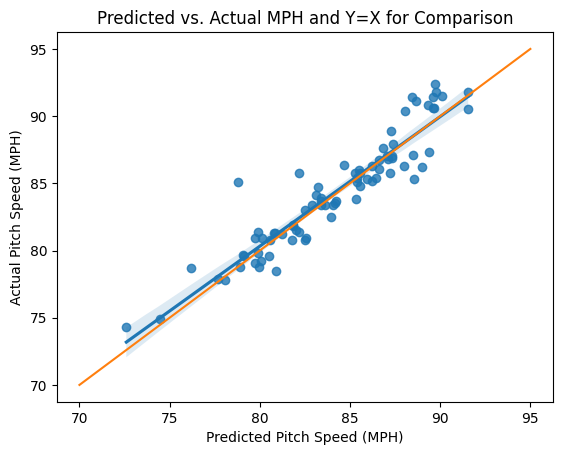

In [1677]:
goal_x = [70, 95]
goal_y = [70, 95]

sns.regplot(x=predictions, y=mph_test)
plt.plot(goal_x, goal_y)
plt.xlabel('Predicted Pitch Speed (MPH)')
plt.ylabel('Actual Pitch Speed (MPH)')
plt.title('Predicted vs. Actual MPH and Y=X for Comparison')

In [1678]:
x = pd.concat([poi_train_new, poi_val_new, poi_test_new], axis=0).drop(columns='session_pitch', axis=1)
y = pd.concat([mph_train, mph_val, mph_test], axis=0)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.131, eta=.3, gamma=0, min_child_weight=1, alpha=0, colsample_bytree=1, colsample_bylevel=1)
linear_model.fit(x, y)

# r_squared = linear_model.score(x_test, mph_test)
# print('R^2: ' + str(r_squared))

# predictions = linear_model.predict(x_test)
# rmse = np.sqrt(mean_squared_error(mph_test, predictions))
# print('RMSE: ' + str(rmse))

XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eta=0.3, eval_metric=None, feature_types=None, gamma=0,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [1679]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.head(10)

,Feature,Importance
45,elbow_transfer_fp_br,0.399932
99,thorax_distal_transfer_fp_br_int_shoulder_tran...,0.102178
89,max_shoulder_horizontal_abduction_int_shoulder...,0.059800
90,elbow_transfer_fp_br_int_shoulder_transfer_fp_br,0.052359
73,session_height_m,0.043993
57,rear_knee_absorption_pkh_fp,0.043495
110,FP_to_BR_time_int_FS_to_BR_time,0.032984
30,torso_rotation_mer,0.025633
103,lead_grf_z_max_int_elbow_varus_moment,0.014347
75,peak_knee_to_FS_time,0.013798


In [1683]:
non_int_importance = importance_df[~importance_df.Feature.str.contains('_int_')]
non_int_importance.head(10)

,Feature,Importance
45,elbow_transfer_fp_br,0.399932
73,session_height_m,0.043993
57,rear_knee_absorption_pkh_fp,0.043495
30,torso_rotation_mer,0.025633
75,peak_knee_to_FS_time,0.013798
9,shoulder_horizontal_abduction_fp,0.011859
32,shoulder_internal_rotation_moment,0.010766
117,stride_angle_2,0.010385
72,session_mass_kg,0.010080
44,shoulder_absorption_fp_br,0.008536


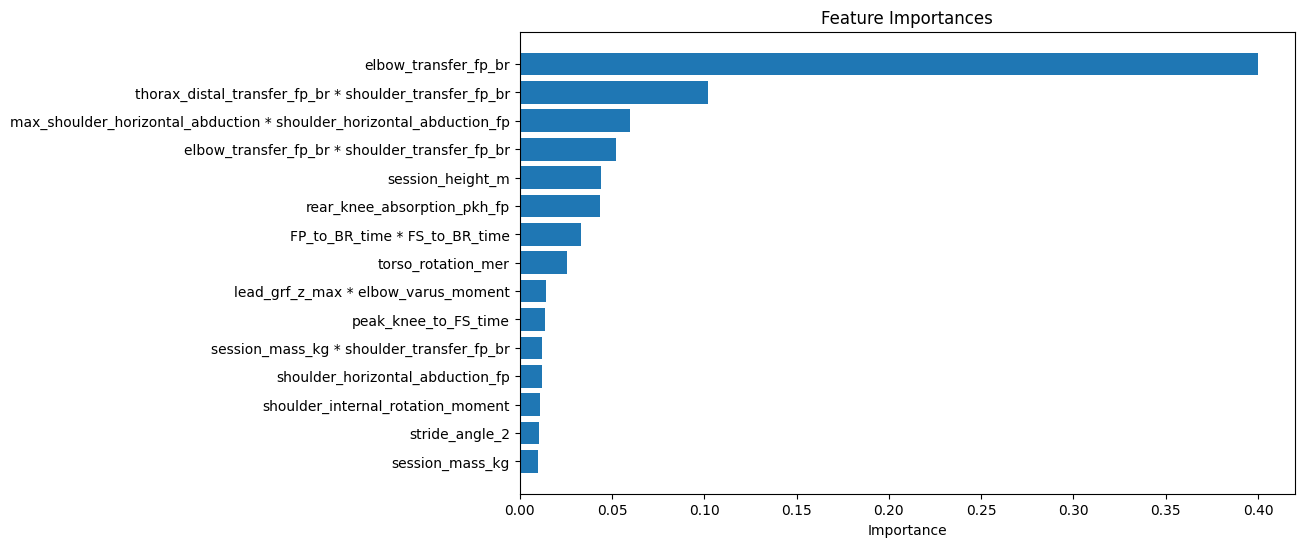

In [1681]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)

bar_df = importance_df.head(15)
bar_df = bar_df.sort_values(by='Importance', ascending=True)

y_labels = bar_df['Feature'].str.replace('_int_', ' * ')

# Plot
plt.figure(figsize=(10, 6))
plt.barh(bar_df['Feature'], bar_df['Importance'])
plt.xlabel('Importance')
plt.yticks(ticks=bar_df['Feature'], labels=y_labels)
plt.title('Feature Importances')
plt.show()


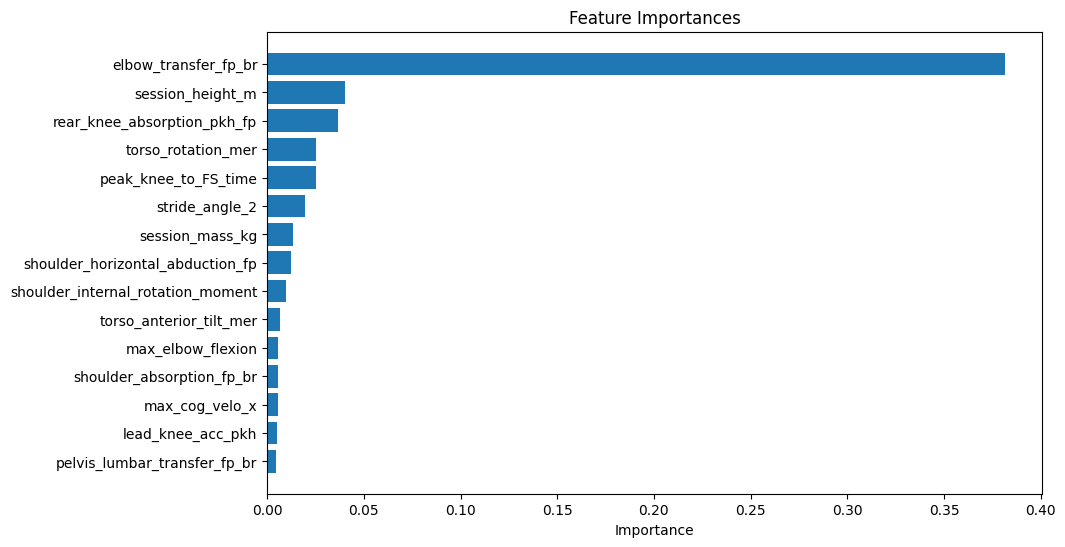

In [1631]:
non_int_importance = non_int_importance.sort_values(by='Importance', ascending=False)

bar_df = non_int_importance.head(15)
bar_df = bar_df.sort_values(by='Importance', ascending=True)

y_labels = bar_df['Feature'].str.replace('_int_', ' * ')

# Plot
plt.figure(figsize=(10, 6))
plt.barh(bar_df['Feature'], bar_df['Importance'])
plt.xlabel('Importance')
plt.yticks(ticks=bar_df['Feature'], labels=y_labels)
plt.title('Feature Importances')
plt.show()


In [1632]:
len(poi_train_new.columns), len(poi_val_new.columns), len(poi_test_new.columns)

(122, 122, 122)

In [1633]:
poi.columns

Index(['session_pitch', 'session', 'p_throws', 'pitch_type', 'pitch_speed_mph',
       'max_shoulder_internal_rotational_velo', 'max_elbow_extension_velo',
       'max_torso_rotational_velo', 'max_rotation_hip_shoulder_separation',
       'max_elbow_flexion', 'max_shoulder_external_rotation',
       'elbow_flexion_fp', 'elbow_pronation_fp',
       'rotation_hip_shoulder_separation_fp',
       'shoulder_horizontal_abduction_fp', 'shoulder_abduction_fp',
       'shoulder_external_rotation_fp', 'lead_knee_extension_angular_velo_fp',
       'lead_knee_extension_angular_velo_br',
       'lead_knee_extension_angular_velo_max', 'torso_anterior_tilt_fp',
       'torso_lateral_tilt_fp', 'torso_rotation_fp', 'pelvis_anterior_tilt_fp',
       'pelvis_lateral_tilt_fp', 'pelvis_rotation_fp', 'max_cog_velo_x',
       'torso_rotation_min', 'max_pelvis_rotational_velo',
       'glove_shoulder_horizontal_abduction_fp', 'glove_shoulder_abduction_fp',
       'glove_shoulder_external_rotation_fp', 'glove_

In [1666]:
corr_matrix = poi.drop(columns=['session_pitch', 'session', 'p_throws', 'pitch_type'], axis=1).corr()

high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature1', 'Feature2', 'Correlation'])
high_corr_df.sort_values(by='Correlation', ascending=False).tail(30)

,Feature1,Feature2,Correlation
62,rear_grf_z_max,shoulder_transfer_fp_br,0.531166
6,pelvis_rotation_fp,torso_lateral_tilt_fp,0.529484
4,torso_rotation_fp,shoulder_external_rotation_fp,0.529174
58,rear_grf_x_max,shoulder_transfer_fp_br,0.526529
73,lead_grf_x_max,rear_grf_x_max,0.525637
15,shoulder_internal_rotation_moment,pitch_speed_mph,0.524939
81,lead_grf_mag_max,shoulder_generation_fp_br,0.524364
51,rear_knee_absorption_pkh_fp,rear_hip_transfer_pkh_fp,0.524190
28,arm_slot,torso_anterior_tilt_br,0.522694
70,rear_grf_mag_max,thorax_distal_transfer_fp_br,0.522640


In [1635]:
len(poi_train_new), len(poi_val_new), len(poi_test_new)

(257, 65, 81)

In [1646]:
full_data = pd.concat([poi_train_new, poi_val_new, poi_test_new], axis=0).drop(columns='session_pitch', axis=1)
full_mph = pd.concat([mph_train, mph_val, mph_test], axis=0)

Text(0.5, 1.0, 'Elbow Transfer FP to BR vs. Pitch Speed (MPH)')

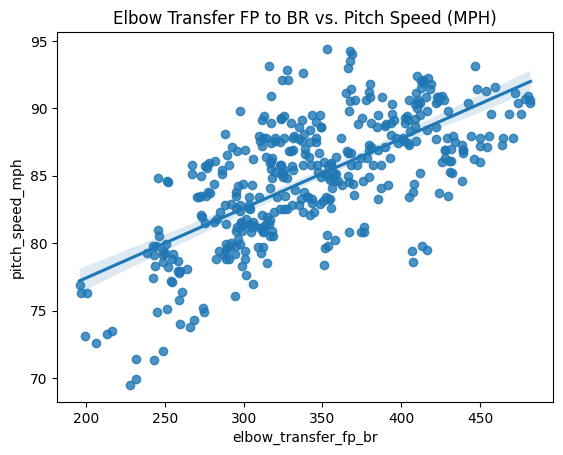

In [1650]:
sns.regplot(x=full_data.elbow_transfer_fp_br, y=full_mph.pitch_speed_mph)
plt.title('Elbow Transfer FP to BR vs. Pitch Speed (MPH)')

Text(0.5, 1.0, 'Rear Knee Absorption PKH to FP vs. Pitch Speed (MPH)')

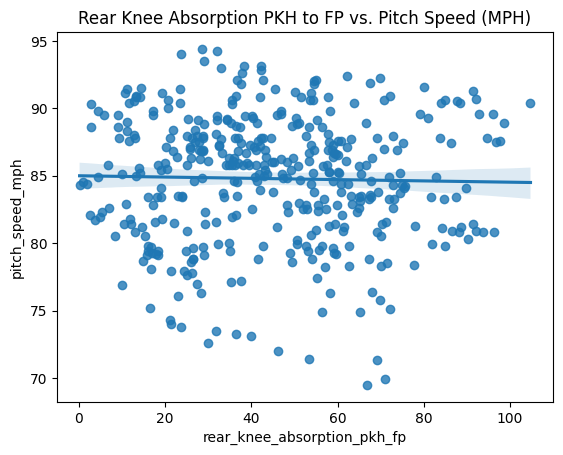

In [1652]:
sns.regplot(x=full_data.rear_knee_absorption_pkh_fp, y=full_mph.pitch_speed_mph)
plt.title('Rear Knee Absorption PKH to FP vs. Pitch Speed (MPH)')

Text(0.5, 1.0, 'Torso Rotatoin at MER vs. Pitch Speed (MPH)')

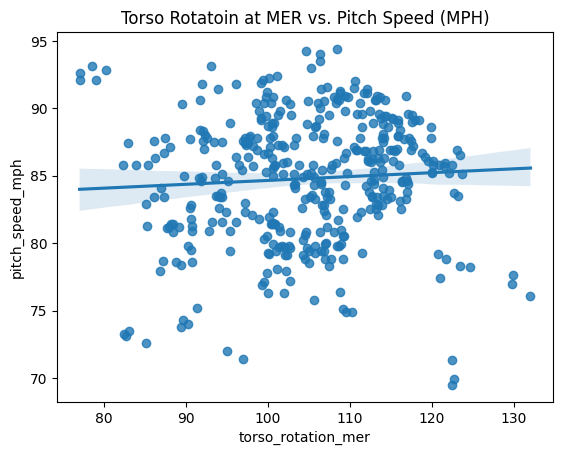

In [1653]:
sns.regplot(x=full_data.torso_rotation_mer, y=full_mph.pitch_speed_mph)
plt.title('Torso Rotatoin at MER vs. Pitch Speed (MPH)')

Text(0.5, 1.0, 'Shoulder Transfer vs. Elbow Transfer - FP to BR')

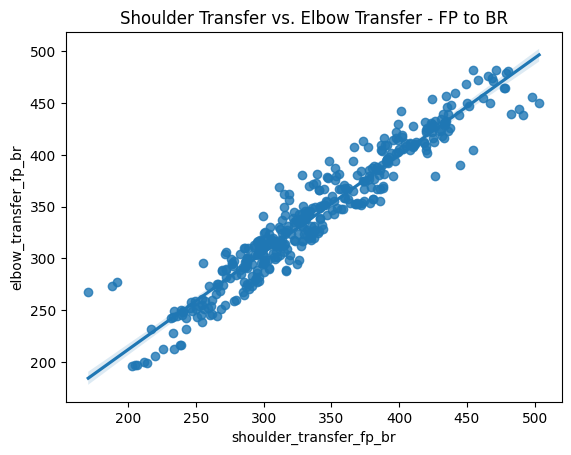

In [1657]:
sns.regplot(x=poi.shoulder_transfer_fp_br, y=poi.elbow_transfer_fp_br)
plt.title('Shoulder Transfer vs. Elbow Transfer - FP to BR')

Text(0.5, 1.0, 'Thorax Distal Transfer vs. Elbow Transfer - FP to BR')

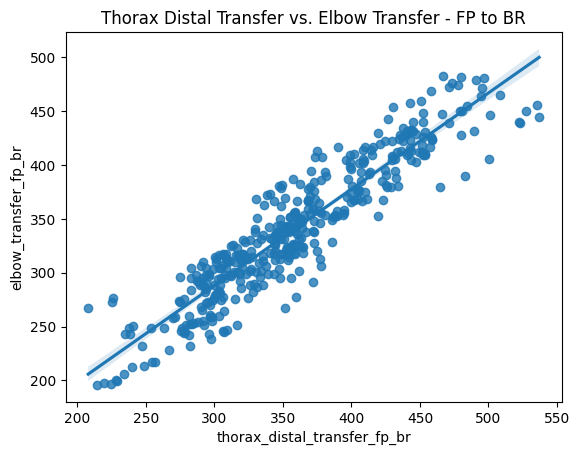

In [1659]:
sns.regplot(x=poi.thorax_distal_transfer_fp_br, y=poi.elbow_transfer_fp_br)
plt.title('Thorax Distal Transfer vs. Elbow Transfer - FP to BR')

Text(0.5, 1.0, 'Rear Ground Reaction Force (Z) vs. Elbow Transfer FP to BR')

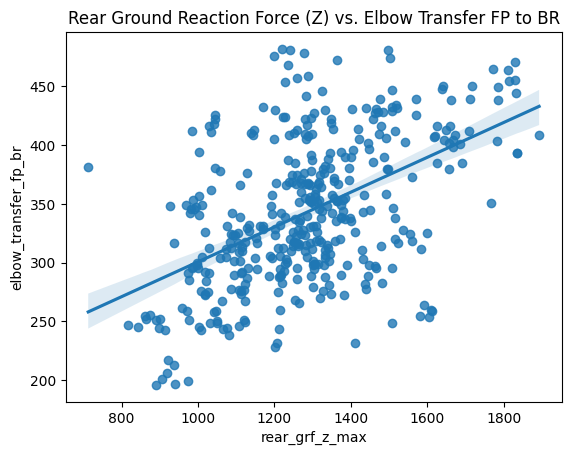

In [1669]:
sns.regplot(x=poi.rear_grf_z_max, y=poi.elbow_transfer_fp_br)
plt.title('Rear Ground Reaction Force (Z) vs. Elbow Transfer FP to BR')